# EMRI Waveforms in Fourier Domain
Here we show how the plots of the paper have been produced

In [1]:
!ls

alpha_bounds.pdf
bf_mcmc.sh
BFoutput_Tobs2_dt15.0_M0.5e6_mu5.0_a0.95_p013.0_e00.4_x01.0_charge0.00014606612798854626_dev1_nwalkers32_ntemps2_nsteps500000.txt
BFoutput_Tobs2_dt15.0_M0.5e6_mu5.0_a0.95_p013.0_e00.4_x01.0_charge0.003651653199713658_dev1_nwalkers32_ntemps2_nsteps500000.txt
covariance.npy
horizon_z
lakshmi_mcmc.sh
M1000000.0_redshift.txt
mass_measurement.pdf
mcmc_BF.py
MCMC_M1e+06_mu1e+01_a0.95_p8.3_e0.4_x1.0_T2.0.txt
MCMC_M1e+06_mu1e+01_a0.95_p8.4_e0.1_x1.0_T2.0.txt
MCMC_M5e+05_mu1e+01_a0.95_p1.2e+01_e0.4_x1.0_T2.0.txt
MCMC_M5e+05_mu5.0_a0.95_p1e+01_e0.4_x1.0_T2.0.txt
mcmc.py
M_redshift.txt
old_results_mcmc
output_Tobs2_dt15.0_M1e6_mu1e1_a0.95_p013.0_e00.1_x01.0_charge0.0_dev1_nwalkers32_ntemps2_nsteps500000.txt
output_Tobs2_dt15.0_M1e6_mu1e1_a0.95_p013.0_e00.1_x01.0_charge0.0_dev1_nwalkers64_ntemps1_nsteps500000.txt
output_Tobs2_dt15.0_M1e6_mu1e1_a0.95_p013.0_e00.4_x01.0_charge0.0_dev0_nwalkers32_ntemps2_nsteps500000.txt
output_Tobs2_dt15.0_M1e6_mu1e1_a0.95_p013.0_e00.4_x0

In [2]:
import sys, time, h5py,os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from few.utils.constants import *
import corner

import matplotlib as mpl

default_width = 5.78853 # in inches
default_ratio = (np.sqrt(5.0) - 1.0) / 2.0 # golden mean

mpl.rcParams.update({
    "text.usetex": True,
    "pgf.texsystem": 'pdflatex',
    "pgf.rcfonts": False,
    "font.family": "serif",
    "figure.figsize": [default_width, default_width * default_ratio],
})
def gelman_rubin(chains):
    """
    Calculate the Gelman-Rubin statistic for a set of chains.

    Parameters:
    - chains: List of 2D arrays, where each array represents a chain.

    Returns:
    - R_hat: Gelman-Rubin statistic.
    """

    # Number of chains
    m = len(chains)

    # Number of samples in each chain
    n = len(chains[0])

    # Calculate the mean of each chain
    chain_means = [np.mean(chain, axis=0) for chain in chains]

    # Calculate the overall mean
    overall_mean = np.mean(chains, axis=(0, 1))

    # Calculate the between-chain variance
    B = n / (m - 1) * np.sum((chain_means - overall_mean) ** 2, axis=0)

    # Calculate the within-chain variance
    W = 1 / (m * (n - 1)) * np.sum((chains - np.expand_dims(chain_means, axis=2)) ** 2)

    # Calculate the estimated variance of the target distribution
    var_hat = (n - 1) / n * W + B / n

    # Calculate the potential scale reduction factor (R-hat)
    R_hat = np.sqrt(var_hat / W)

    return R_hat

In [3]:
chain_1 = np.random.randn(100, 1)
chain_2 = np.random.randn(100, 1)
chain_3 = np.random.randn(100, 1)
chains = np.asarray([chain_1, chain_2, chain_3])

R_hat = gelman_rubin(chains)
print("Gelman-Rubin Statistic:", R_hat,chains.shape)

Gelman-Rubin Statistic: [0.99667287] (3, 100, 1)


## Import results

In [4]:
# fontsize label
fs_lab = 18
# legend
fs_leg = 14
# ticks
fs_ticks = 14

## Posterior comparison

In [5]:
from eryn.backends import HDFBackend
from eryn.utils.utility import *
import h5py, glob

In [6]:
!ls test

MCMC_adaptive_M1e+06_mu1e+01_a0.9_p8.5_e0.4_x1.0_T2.0_seed26011996_nw8_nt1_corner.png
MCMC_adaptive_M1e+06_mu1e+01_a0.9_p8.5_e0.4_x1.0_T2.0_seed26011996_nw8_nt1.h5
MCMC_adaptive_M1e+06_mu1e+01_a0.9_p8.5_e0.4_x1.0_T2.0_seed26011996_nw8_nt1_injected_pars.npy
MCMC_adaptive_M1e+06_mu1e+01_a0.9_p8.5_e0.4_x1.0_T2.0_seed26011996_nw8_nt1injection_fd.pdf
MCMC_adaptive_M1e+06_mu1e+01_a0.9_p8.5_e0.4_x1.0_T2.0_seed26011996_nw8_nt1injection_td.pdf
MCMC_adaptive_M1e+06_mu1e+01_a0.9_p8.5_e0.4_x1.0_T2.0_seed26011996_nw8_nt1mismatch_evolution.pdf
MCMC_new_M1e+06_mu1e+01_a0.9_p8.5_e0.4_x1.0_charge0.0_T2.0_seed26011996_nw8_nt1_corner.png
MCMC_new_M1e+06_mu1e+01_a0.9_p8.5_e0.4_x1.0_charge0.0_T2.0_seed26011996_nw8_nt1.h5
MCMC_new_M1e+06_mu1e+01_a0.9_p8.5_e0.4_x1.0_charge0.0_T2.0_seed26011996_nw8_nt1_injected_pars.npy
MCMC_new_M1e+06_mu1e+01_a0.9_p8.5_e0.4_x1.0_charge0.0_T2.0_seed26011996_nw8_nt1injection_fd.pdf
MCMC_new_M1e+06_mu1e+01_a0.9_p8.5_e0.4_x1.0_charge0.0_T2.0_seed26011996_nw8_nt1injection_td.pdf


In [7]:
# filename = "test/MCMC_BF_M1e+06_mu1e+01_a0.9_p8.5_e0.4_x1.0_d0.0_T2.0_seed26011996_nw16_nt3.h5"
# file  = HDFBackend(filename)
# print(filename)
# print(file.get_move_info(),file.iteration)

In [14]:

# Automated windowing procedure following Sokal (1989)
def auto_window(taus, c):
    m = np.arange(len(taus)) < c * taus
    if np.any(m):
        return np.argmin(m)
    return len(taus) - 1

def next_pow_two(n):
    i = 1
    while i < n:
        i = i << 1
    return i

def autocorr_func_1d(x, norm=True):
    x = np.atleast_1d(x)
    if len(x.shape) != 1:
        raise ValueError("invalid dimensions for 1D autocorrelation function")
    n = next_pow_two(len(x))

    # Compute the FFT and then (from that) the auto-correlation function
    f = np.fft.fft(x - np.mean(x), n=2 * n)
    acf = np.fft.ifft(f * np.conjugate(f))[: len(x)].real
    acf /= 4 * n

    # Optionally normalize
    if norm:
        acf /= acf[0]

    return acf

def autocorr_gw2010(y, c=5.0):
    f = autocorr_func_1d(np.mean(y, axis=0))
    taus = 2.0 * np.cumsum(f) - 1.0
    window = auto_window(taus, c)
    return taus[window]

def autocorr_new(y, c=5.0):
    f = np.zeros(y.shape[1])
    for yy in y:
        f += autocorr_func_1d(yy)
    f /= len(y)
    taus = 2.0 * np.cumsum(f) - 1.0
    window = auto_window(taus, c)
    return taus[window]

import healpy as hp

def hp_bin(phi, theta, nside):

    npixels = hp.nside2npix(nside)
    indices = hp.ang2pix(nside, theta, phi)

    idx, counts = np.unique(indices, return_counts=True)

    hpx_map = np.zeros(npixels, dtype=int)
    hpx_map[idx] = counts

    return hpx_map

def get_autocorr_plot(to_check):
    n_dim  = to_check.shape[-1]
    plt.figure()
    for var in range(n_dim):
        y = to_check[:,:,var].T
        # Compute the estimators for a few different chain lengths
        N = np.exp(np.linspace(np.log(100), np.log(y.shape[1]), 10)).astype(int)
        gw2010 = np.empty(len(N))
        new = np.empty(len(N))
        for i, n in enumerate(N):
            gw2010[i] = autocorr_gw2010(y[:, :n])
            new[i] = autocorr_new(y[:, :n])

        # Plot the comparisons
        # plt.loglog(N, gw2010, "o-", label="G&W 2010")
        plt.loglog(N, new, "o-", label=f"new var{var}")

    plt.plot(N, N / 50.0, "--k", label=r"$\tau = N/50$")
    # plt.axhline(true_tau, color="k", label="truth", zorder=-100)
    plt.xlabel("number of samples, $N$")
    plt.ylabel(r"$\tau$ estimates")
    plt.legend(fontsize=14);
    plt.show()



In [9]:
sorted(glob.glob('results_mcmc/*nw64_nt1.h5'))

['results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p1e+01_e0.4_x1.0_T4.0_seed26011996_nw64_nt1.h5',
 'results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p8.3_e0.4_x1.0_T2.0_seed26011996_nw64_nt1.h5',
 'results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p8.4_e0.1_x1.0_T2.0_seed26011996_nw64_nt1.h5',
 'results_mcmc/MCMC_new_M1e+06_mu5.0_a0.95_p1.2e+01_e0.4_x-1.0_T2.0_seed26011996_nw64_nt1.h5',
 'results_mcmc/MCMC_new_M5e+05_mu1e+01_a0.95_p1.2e+01_e0.4_x1.0_T2.0_seed26011996_nw64_nt1.h5',
 'results_mcmc/MCMC_new_M5e+05_mu5.0_a0.95_p1e+01_e0.4_x1.0_T2.0_seed26011996_nw64_nt1.h5']

In [10]:
# datasets = sorted(glob.glob('results_mcmc/*charge*.h5'))
datasets = sorted(glob.glob('results_mcmc/MCMC_new*x1.0_T*nw64_nt1.h5'))
print(datasets)
# pars_inj = sorted(glob.glob('results_mcmc/*charge*.npy'))
pars_inj = sorted(glob.glob('results_mcmc/MCMC_new*nw64_nt1_injected_pars.npy'))
print(pars_inj)

['results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p1e+01_e0.4_x1.0_T4.0_seed26011996_nw64_nt1.h5', 'results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p8.3_e0.4_x1.0_T2.0_seed26011996_nw64_nt1.h5', 'results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p8.4_e0.1_x1.0_T2.0_seed26011996_nw64_nt1.h5', 'results_mcmc/MCMC_new_M5e+05_mu1e+01_a0.95_p1.2e+01_e0.4_x1.0_T2.0_seed26011996_nw64_nt1.h5', 'results_mcmc/MCMC_new_M5e+05_mu5.0_a0.95_p1e+01_e0.4_x1.0_T2.0_seed26011996_nw64_nt1.h5']
['results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p1e+01_e0.4_x1.0_T4.0_seed26011996_nw64_nt1_injected_pars.npy', 'results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p8.3_e0.4_x1.0_T2.0_seed26011996_nw64_nt1_injected_pars.npy', 'results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p8.4_e0.1_x1.0_T2.0_seed26011996_nw64_nt1_injected_pars.npy', 'results_mcmc/MCMC_new_M1e+06_mu5.0_a0.95_p1.2e+01_e0.4_x-1.0_T2.0_seed26011996_nw64_nt1_injected_pars.npy', 'results_mcmc/MCMC_new_M5e+05_mu1e+01_a0.95_p1.2e+01_e0.4_x1.0_T2.0_seed26011996_nw64_nt1_injected_pars.npy'

In [11]:
datasets

['results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p1e+01_e0.4_x1.0_T4.0_seed26011996_nw64_nt1.h5',
 'results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p8.3_e0.4_x1.0_T2.0_seed26011996_nw64_nt1.h5',
 'results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p8.4_e0.1_x1.0_T2.0_seed26011996_nw64_nt1.h5',
 'results_mcmc/MCMC_new_M5e+05_mu1e+01_a0.95_p1.2e+01_e0.4_x1.0_T2.0_seed26011996_nw64_nt1.h5',
 'results_mcmc/MCMC_new_M5e+05_mu5.0_a0.95_p1e+01_e0.4_x1.0_T2.0_seed26011996_nw64_nt1.h5']

In [12]:
pars_inj

['results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p1e+01_e0.4_x1.0_T4.0_seed26011996_nw64_nt1_injected_pars.npy',
 'results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p8.3_e0.4_x1.0_T2.0_seed26011996_nw64_nt1_injected_pars.npy',
 'results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p8.4_e0.1_x1.0_T2.0_seed26011996_nw64_nt1_injected_pars.npy',
 'results_mcmc/MCMC_new_M1e+06_mu5.0_a0.95_p1.2e+01_e0.4_x-1.0_T2.0_seed26011996_nw64_nt1_injected_pars.npy',
 'results_mcmc/MCMC_new_M5e+05_mu1e+01_a0.95_p1.2e+01_e0.4_x1.0_T2.0_seed26011996_nw64_nt1_injected_pars.npy',
 'results_mcmc/MCMC_new_M5e+05_mu5.0_a0.95_p1e+01_e0.4_x1.0_T2.0_seed26011996_nw64_nt1_injected_pars.npy']

{'DIMEMove_0': {'acceptance_fraction': array([[2.51155314e-05, 2.51155314e-05, 2.51155314e-05, 2.51155314e-05,
        2.51155314e-05, 2.51155314e-05, 2.51155314e-05, 2.51155314e-05,
        2.51155314e-05, 2.51155314e-05, 2.51155314e-05, 2.51155314e-05,
        2.51155314e-05, 2.51155314e-05, 2.51155314e-05, 2.51155314e-05,
        2.51155314e-05, 2.51155314e-05, 2.51155314e-05, 2.51155314e-05,
        2.51155314e-05, 2.51155314e-05, 2.51155314e-05, 2.51155314e-05,
        2.51155314e-05, 2.51155314e-05, 2.51155314e-05, 2.51155314e-05,
        2.51155314e-05, 2.51155314e-05, 2.51155314e-05, 2.51155314e-05,
        2.51155314e-05, 2.51155314e-05, 2.51155314e-05, 2.51155314e-05,
        2.51155314e-05, 2.51155314e-05, 2.51155314e-05, 2.51155314e-05,
        2.51155314e-05, 2.51155314e-05, 2.51155314e-05, 2.51155314e-05,
        2.51155314e-05, 2.51155314e-05, 2.51155314e-05, 2.51155314e-05,
        2.51155314e-05, 2.51155314e-05, 2.51155314e-05, 2.51155314e-05,
        2.51155314e-05, 2

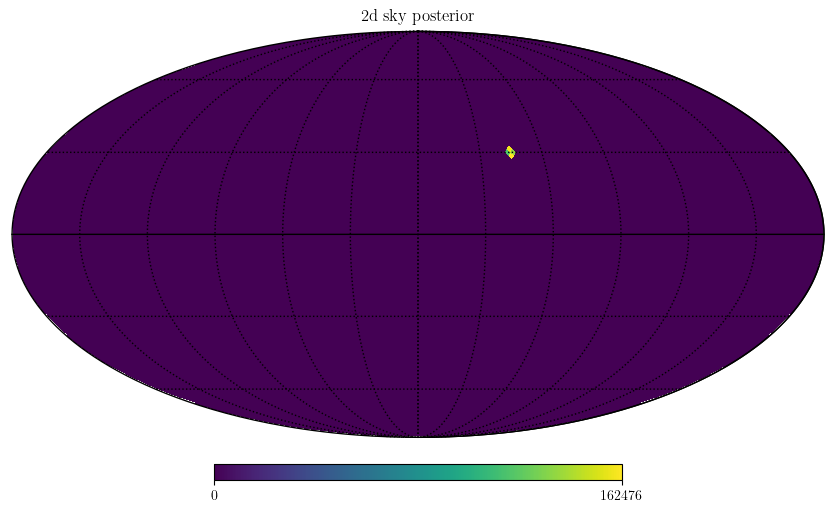

{'DIMEMove_0': {'acceptance_fraction': array([[2.11233392e-05, 2.11233392e-05, 2.11233392e-05, 2.11233392e-05,
        2.11233392e-05, 2.11233392e-05, 2.11233392e-05, 2.11233392e-05,
        2.11233392e-05, 2.11233392e-05, 2.11233392e-05, 2.11233392e-05,
        2.11233392e-05, 2.11233392e-05, 2.11233392e-05, 2.11233392e-05,
        2.11233392e-05, 2.11233392e-05, 2.11233392e-05, 2.11233392e-05,
        2.11233392e-05, 2.11233392e-05, 2.11233392e-05, 2.11233392e-05,
        2.11233392e-05, 2.11233392e-05, 2.11233392e-05, 2.11233392e-05,
        2.11233392e-05, 2.11233392e-05, 2.11233392e-05, 2.11233392e-05,
        2.11233392e-05, 2.11233392e-05, 2.11233392e-05, 2.11233392e-05,
        2.11233392e-05, 2.11233392e-05, 2.11233392e-05, 2.11233392e-05,
        2.11233392e-05, 2.11233392e-05, 2.11233392e-05, 2.11233392e-05,
        2.11233392e-05, 2.11233392e-05, 2.11233392e-05, 2.11233392e-05,
        2.11233392e-05, 2.11233392e-05, 2.11233392e-05, 2.11233392e-05,
        2.11233392e-05, 2

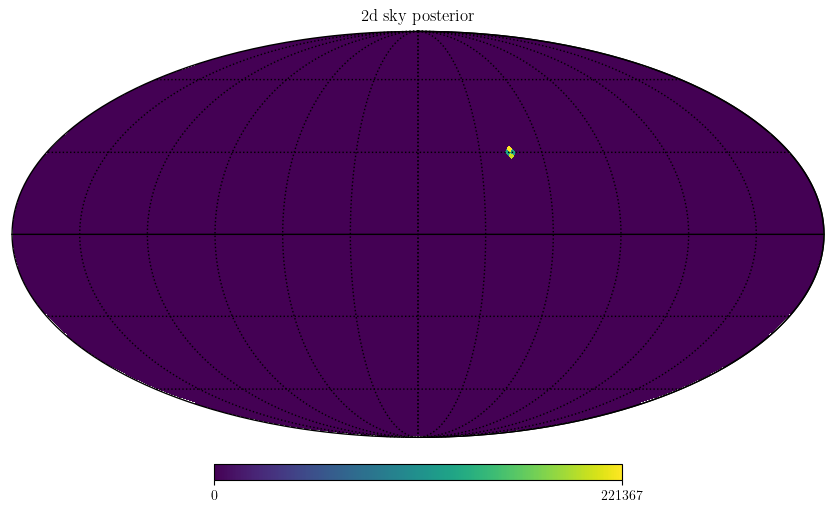

{'DIMEMove_0': {'acceptance_fraction': array([[2.61437908e-05, 2.61437908e-05, 2.61437908e-05, 2.61437908e-05,
        2.61437908e-05, 2.61437908e-05, 2.61437908e-05, 2.61437908e-05,
        2.61437908e-05, 2.61437908e-05, 2.61437908e-05, 2.61437908e-05,
        2.61437908e-05, 2.61437908e-05, 2.61437908e-05, 2.61437908e-05,
        2.61437908e-05, 2.61437908e-05, 2.61437908e-05, 2.61437908e-05,
        2.61437908e-05, 2.61437908e-05, 2.61437908e-05, 2.61437908e-05,
        2.61437908e-05, 2.61437908e-05, 2.61437908e-05, 2.61437908e-05,
        2.61437908e-05, 2.61437908e-05, 2.61437908e-05, 2.61437908e-05,
        2.61437908e-05, 2.61437908e-05, 2.61437908e-05, 2.61437908e-05,
        2.61437908e-05, 2.61437908e-05, 2.61437908e-05, 2.61437908e-05,
        2.61437908e-05, 2.61437908e-05, 2.61437908e-05, 2.61437908e-05,
        2.61437908e-05, 2.61437908e-05, 2.61437908e-05, 2.61437908e-05,
        2.61437908e-05, 2.61437908e-05, 2.61437908e-05, 2.61437908e-05,
        2.61437908e-05, 2

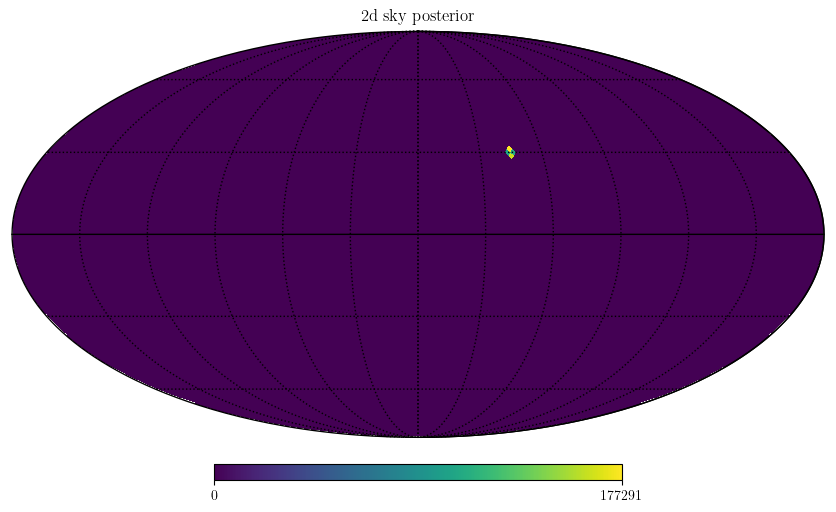

{'DIMEMove_0': {'acceptance_fraction': array([[2.2462824e-05, 2.2462824e-05, 2.2462824e-05, 2.2462824e-05,
        2.2462824e-05, 2.2462824e-05, 2.2462824e-05, 2.2462824e-05,
        2.2462824e-05, 2.2462824e-05, 2.2462824e-05, 2.2462824e-05,
        2.2462824e-05, 2.2462824e-05, 2.2462824e-05, 2.2462824e-05,
        2.2462824e-05, 2.2462824e-05, 2.2462824e-05, 2.2462824e-05,
        2.2462824e-05, 2.2462824e-05, 2.2462824e-05, 2.2462824e-05,
        2.2462824e-05, 2.2462824e-05, 2.2462824e-05, 2.2462824e-05,
        2.2462824e-05, 2.2462824e-05, 2.2462824e-05, 2.2462824e-05,
        2.2462824e-05, 2.2462824e-05, 2.2462824e-05, 2.2462824e-05,
        2.2462824e-05, 2.2462824e-05, 2.2462824e-05, 2.2462824e-05,
        2.2462824e-05, 2.2462824e-05, 2.2462824e-05, 2.2462824e-05,
        2.2462824e-05, 2.2462824e-05, 2.2462824e-05, 2.2462824e-05,
        2.2462824e-05, 2.2462824e-05, 2.2462824e-05, 2.2462824e-05,
        2.2462824e-05, 2.2462824e-05, 2.2462824e-05, 2.2462824e-05,
        2

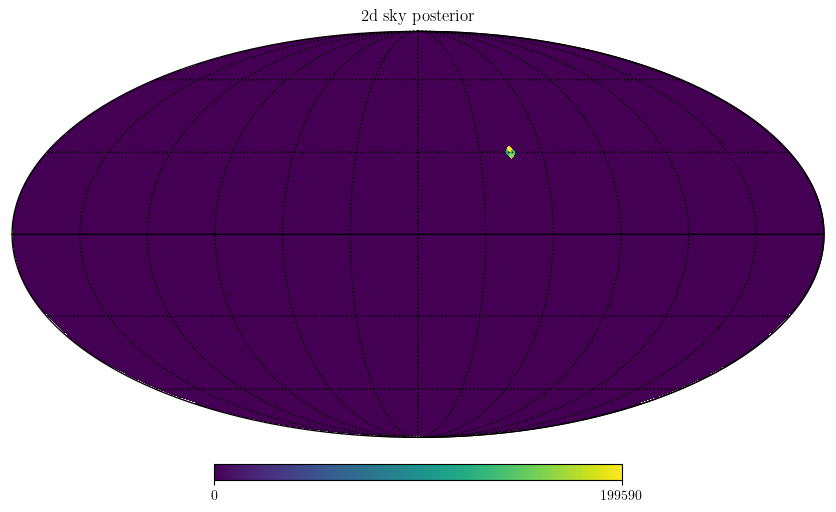

{'DIMEMove_0': {'acceptance_fraction': array([[2.48762407e-05, 2.48762407e-05, 2.48762407e-05, 2.48762407e-05,
        2.48762407e-05, 2.48762407e-05, 2.48762407e-05, 2.48762407e-05,
        2.48762407e-05, 2.48762407e-05, 2.48762407e-05, 2.48762407e-05,
        2.48762407e-05, 2.48762407e-05, 2.48762407e-05, 2.48762407e-05,
        2.48762407e-05, 2.48762407e-05, 2.48762407e-05, 2.48762407e-05,
        2.48762407e-05, 2.48762407e-05, 2.48762407e-05, 2.48762407e-05,
        2.48762407e-05, 2.48762407e-05, 2.48762407e-05, 2.48762407e-05,
        2.48762407e-05, 2.48762407e-05, 2.48762407e-05, 2.48762407e-05,
        2.48762407e-05, 2.48762407e-05, 2.48762407e-05, 2.48762407e-05,
        2.48762407e-05, 2.48762407e-05, 2.48762407e-05, 2.48762407e-05,
        2.48762407e-05, 2.48762407e-05, 2.48762407e-05, 2.48762407e-05,
        2.48762407e-05, 2.48762407e-05, 2.48762407e-05, 2.48762407e-05,
        2.48762407e-05, 2.48762407e-05, 2.48762407e-05, 2.48762407e-05,
        2.48762407e-05, 2

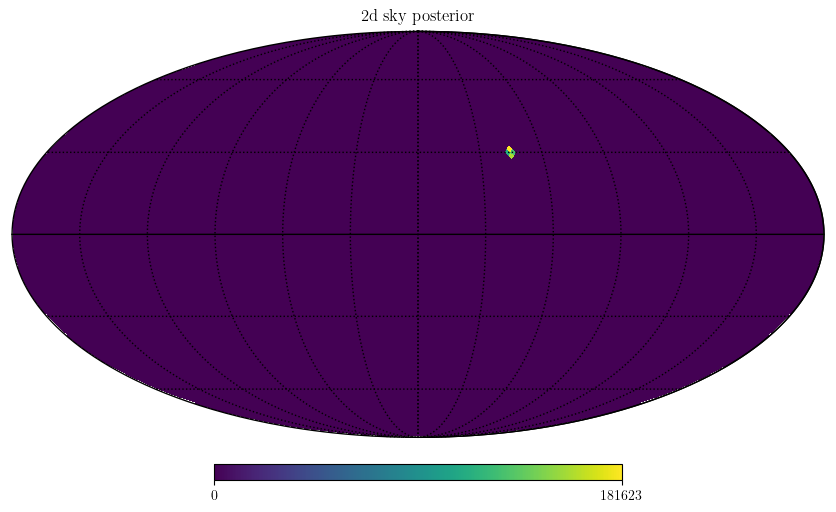

In [30]:
temp=0

samp_final = []
inj_pars = []
for filename,el in zip(datasets[:],pars_inj[:]):
    file  = HDFBackend(filename)
    # print(filename)
    print(file.get_move_info())
    max_iter = file.iteration
    burn = int(max_iter*0.25)
    thin = 10
    ll = file.get_log_like(discard=burn, thin=thin)
    
    print("autocorrelation",file.get_autocorr_time(discard=burn, thin=thin))
    print(ll.shape,(np.sum(np.isnan(ll),axis=0)==0)[0])
    mask = np.arange(file.nwalkers)[(np.sum(np.isnan(ll),axis=0)==0)[0]]#[file.get_move_info()['StretchMove_0']['acceptance_fraction'][0]>0.1]
    # plt.figure()
    # [plt.plot(ll[:,temp,walker],'-',label=f'{walker}') for walker in mask]
    # plt.show()
    
    
    # # get samples
    samp = file.get_chain(discard=burn, thin=thin)['emri'][:,temp,mask,...]
    inds = file.get_inds(discard=burn, thin=thin)['emri'][:]
    # inds = np.random.randint(0,2,size=inds.shape,dtype=bool)
    # print(samp.shape, inds.shape)
    toplot = samp[inds[:,temp,mask,...]]
    
    # sky location
    here  = toplot[:,6:8].copy()
    here[:,0] = np.arccos(here[:,0])
    hmap = hp_bin(here[:, 1],here[:, 0], 32)
    ax = hp.mollview(hmap, rot=180, title='2d sky posterior')
    hp.graticule()
    plt.show()
    
    # sky angle
    here  = toplot[:,6:8].copy()
    here[:,0] = np.arccos(here[:,0])
    hmap = hp_bin(here[:, 1],here[:, 0], 32)
    ax = hp.mollview(hmap, rot=180, title='2d sky posterior')
    hp.graticule()
    plt.show()

    # plt.figure(); corner.corner(toplot[:,8:10]); plt.show()
    # for ii in range(12):
    #     plt.figure()
    #     plt.title(f'variable {ii}')
    #     plt.plot(get_acf(toplot[:,ii], fast=True))
    #     plt.show()

    # GR_stat = gelman_rubin([samp[:,el][...,None] for el in range(len(mask))] )
    # print(GR_stat)
    # get_autocorr_plot(samp[:,:,0,:])
    # logl = ll[:,temp,mask,...]

    truths = np.load(el)
    # # plt.figure(); corner.corner(toplot[:], truths=truths); plt.show()

    # print(toplot[:,-1].max())
    samp_final.append(toplot)
    # # samp_final.append( np.hstack((samp[inds[:,temp,mask,...]],logl[inds[:,temp,mask,0],None])) )
    
    inj_pars.append(truths)
    # # np.save(filename[:-3]+'covariance.npy',np.cov(toplot.T))
    # np.savetxt(filename[:-3]+'_params',toplot[-1000:])

(array([  2.4319328 ,  10.99891957,  11.2263042 ,  21.53224203,
         16.81346949,  28.05709823,  20.27837819,  55.76554002,
         80.00907311, 126.73120141, 154.32703367, 138.82156722,
        185.21236363, 182.78043083, 191.78269676, 195.95358061,
        190.29928272, 203.77561201, 221.29505664, 168.01342305,
        165.35194005, 163.04994133, 184.86154162, 176.84460911,
        108.78730546,  65.85492105,  53.22965996,  28.44473489,
         21.79427575,   7.29363282]),
 array([0.00452653, 0.00484084, 0.00515514, 0.00546945, 0.00578375,
        0.00609806, 0.00641236, 0.00672667, 0.00704097, 0.00735528,
        0.00766958, 0.00798389, 0.0082982 , 0.0086125 , 0.00892681,
        0.00924111, 0.00955542, 0.00986972, 0.01018403, 0.01049833,
        0.01081264, 0.01112695, 0.01144125, 0.01175556, 0.01206986,
        0.01238417, 0.01269847, 0.01301278, 0.01332708, 0.01364139,
        0.0139557 ]),
 <BarContainer object of 30 artists>)

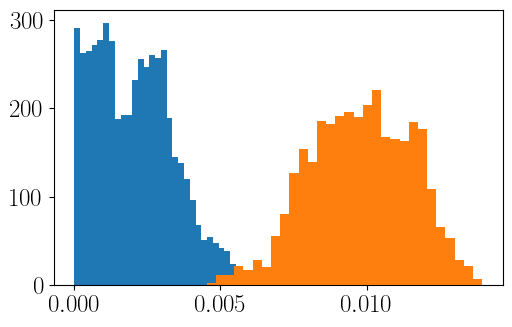

In [90]:
# plt.hist(samp_final[0][:,0],bins=np.linspace(np.log(1e6-10),np.log(1e6+10)),density=True)
plt.hist(samp_final[0][:,-1],bins=30,density=True)
plt.hist(samp_final[1][:,-1],bins=30,density=True)

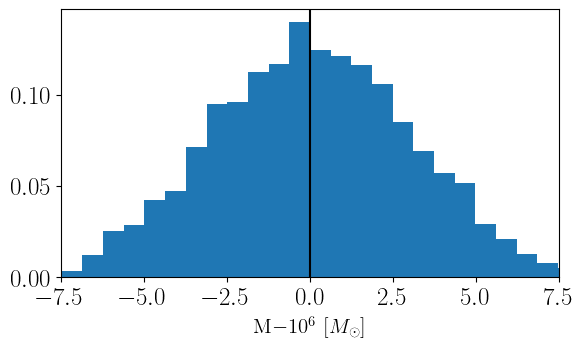

In [89]:
# plt.figure(figsize=(4,3)); 
plt.hist(np.exp(samp_final[1][:,0])-1e6,bins=40,density=True)
plt.axvline(0.0,color='k')
plt.xlabel('M$- 10^6 \, \, [M_\odot]$',fontsize=15)
plt.xlim(-7.5,7.5)
plt.tight_layout()
plt.savefig('mass_measurement.pdf')

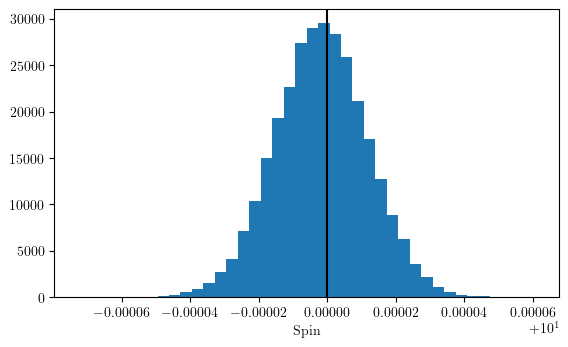

In [26]:
plt.figure(); plt.hist(np.exp(samp_final[0][:,1]),bins=40,density=True)
plt.axvline(np.exp(inj_pars[0][1]),color='k')
plt.xlabel('Spin')
plt.tight_layout()
plt.savefig('spin_measurement.pdf')

<Figure size 578.853x357.751 with 0 Axes>

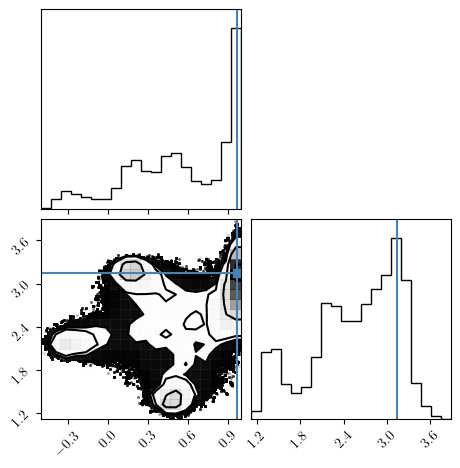

In [39]:
plt.figure(); corner.corner(samp_final[0][:,8:10], truths=inj_pars[0][8:10]); plt.show()

<Figure size 578.853x357.751 with 0 Axes>

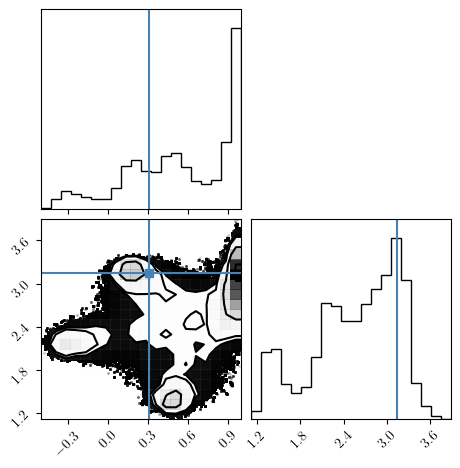

In [76]:
plt.figure(); corner.corner(samp_final[0][:,8:10], truths=(np.cos(np.arccos(0.95)-np.pi/2),(np.pi))); plt.show()

<Figure size 578.853x357.751 with 0 Axes>

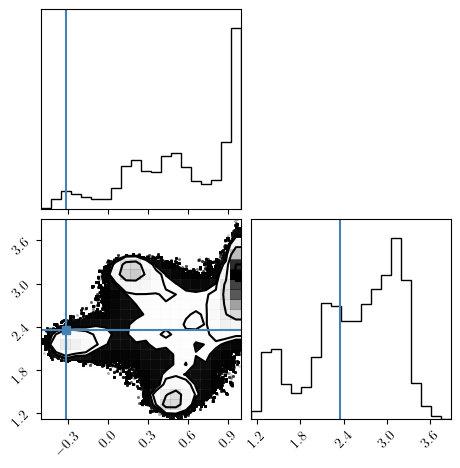

In [79]:
plt.figure(); corner.corner(samp_final[0][:,8:10], truths=(np.cos(np.arccos(0.95)+np.pi/2),(np.pi-np.pi/4))); plt.show()

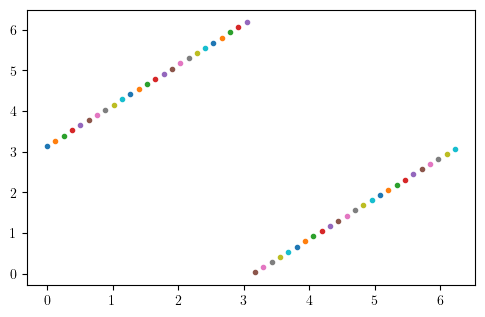

In [20]:
def reflect_cosines_array(cos_ins,angle_ins,rotfac=np.pi,modfac=2*np.pi):
    """helper to reflect cosines of coordinates around poles  to get them between -1 and 1,
        which requires also rotating the signal by rotfac each time, then mod the angle by modfac"""
    if cos_ins < -1.:
        cos_ins = -1.+(-(cos_ins+1.))%4
        angle_ins += rotfac
    if cos_ins > 1.:
        cos_ins = 1.-(cos_ins-1.)%4
        angle_ins += rotfac
        #if this reflects even number of times, params_in[1] after is guaranteed to be between -1 and -3, so one more correction attempt will suffice
        if cos_ins < -1.:
            cos_ins = -1.+(-(cos_ins+1.))%4
            angle_ins += rotfac
    angle_ins = angle_ins%modfac
    return cos_ins,angle_ins


[plt.plot(el,reflect_cosines_array(-1.1,el)[1],'.') for el in np.linspace(0,2*np.pi*0.99)]
# [plt.plot(el,reflect_cosines_array(1.3,el)[1],'.') for el in np.linspace(0,2*np.pi)]
plt.show()

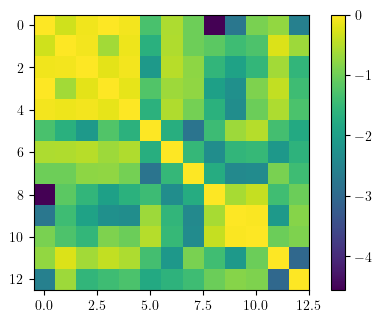

In [24]:
# np.load('covariance.npy')
plt.imshow(np.log10(np.abs(np.corrcoef(samp_final[0].T))))
plt.colorbar()

<Figure size 578.853x357.751 with 0 Axes>

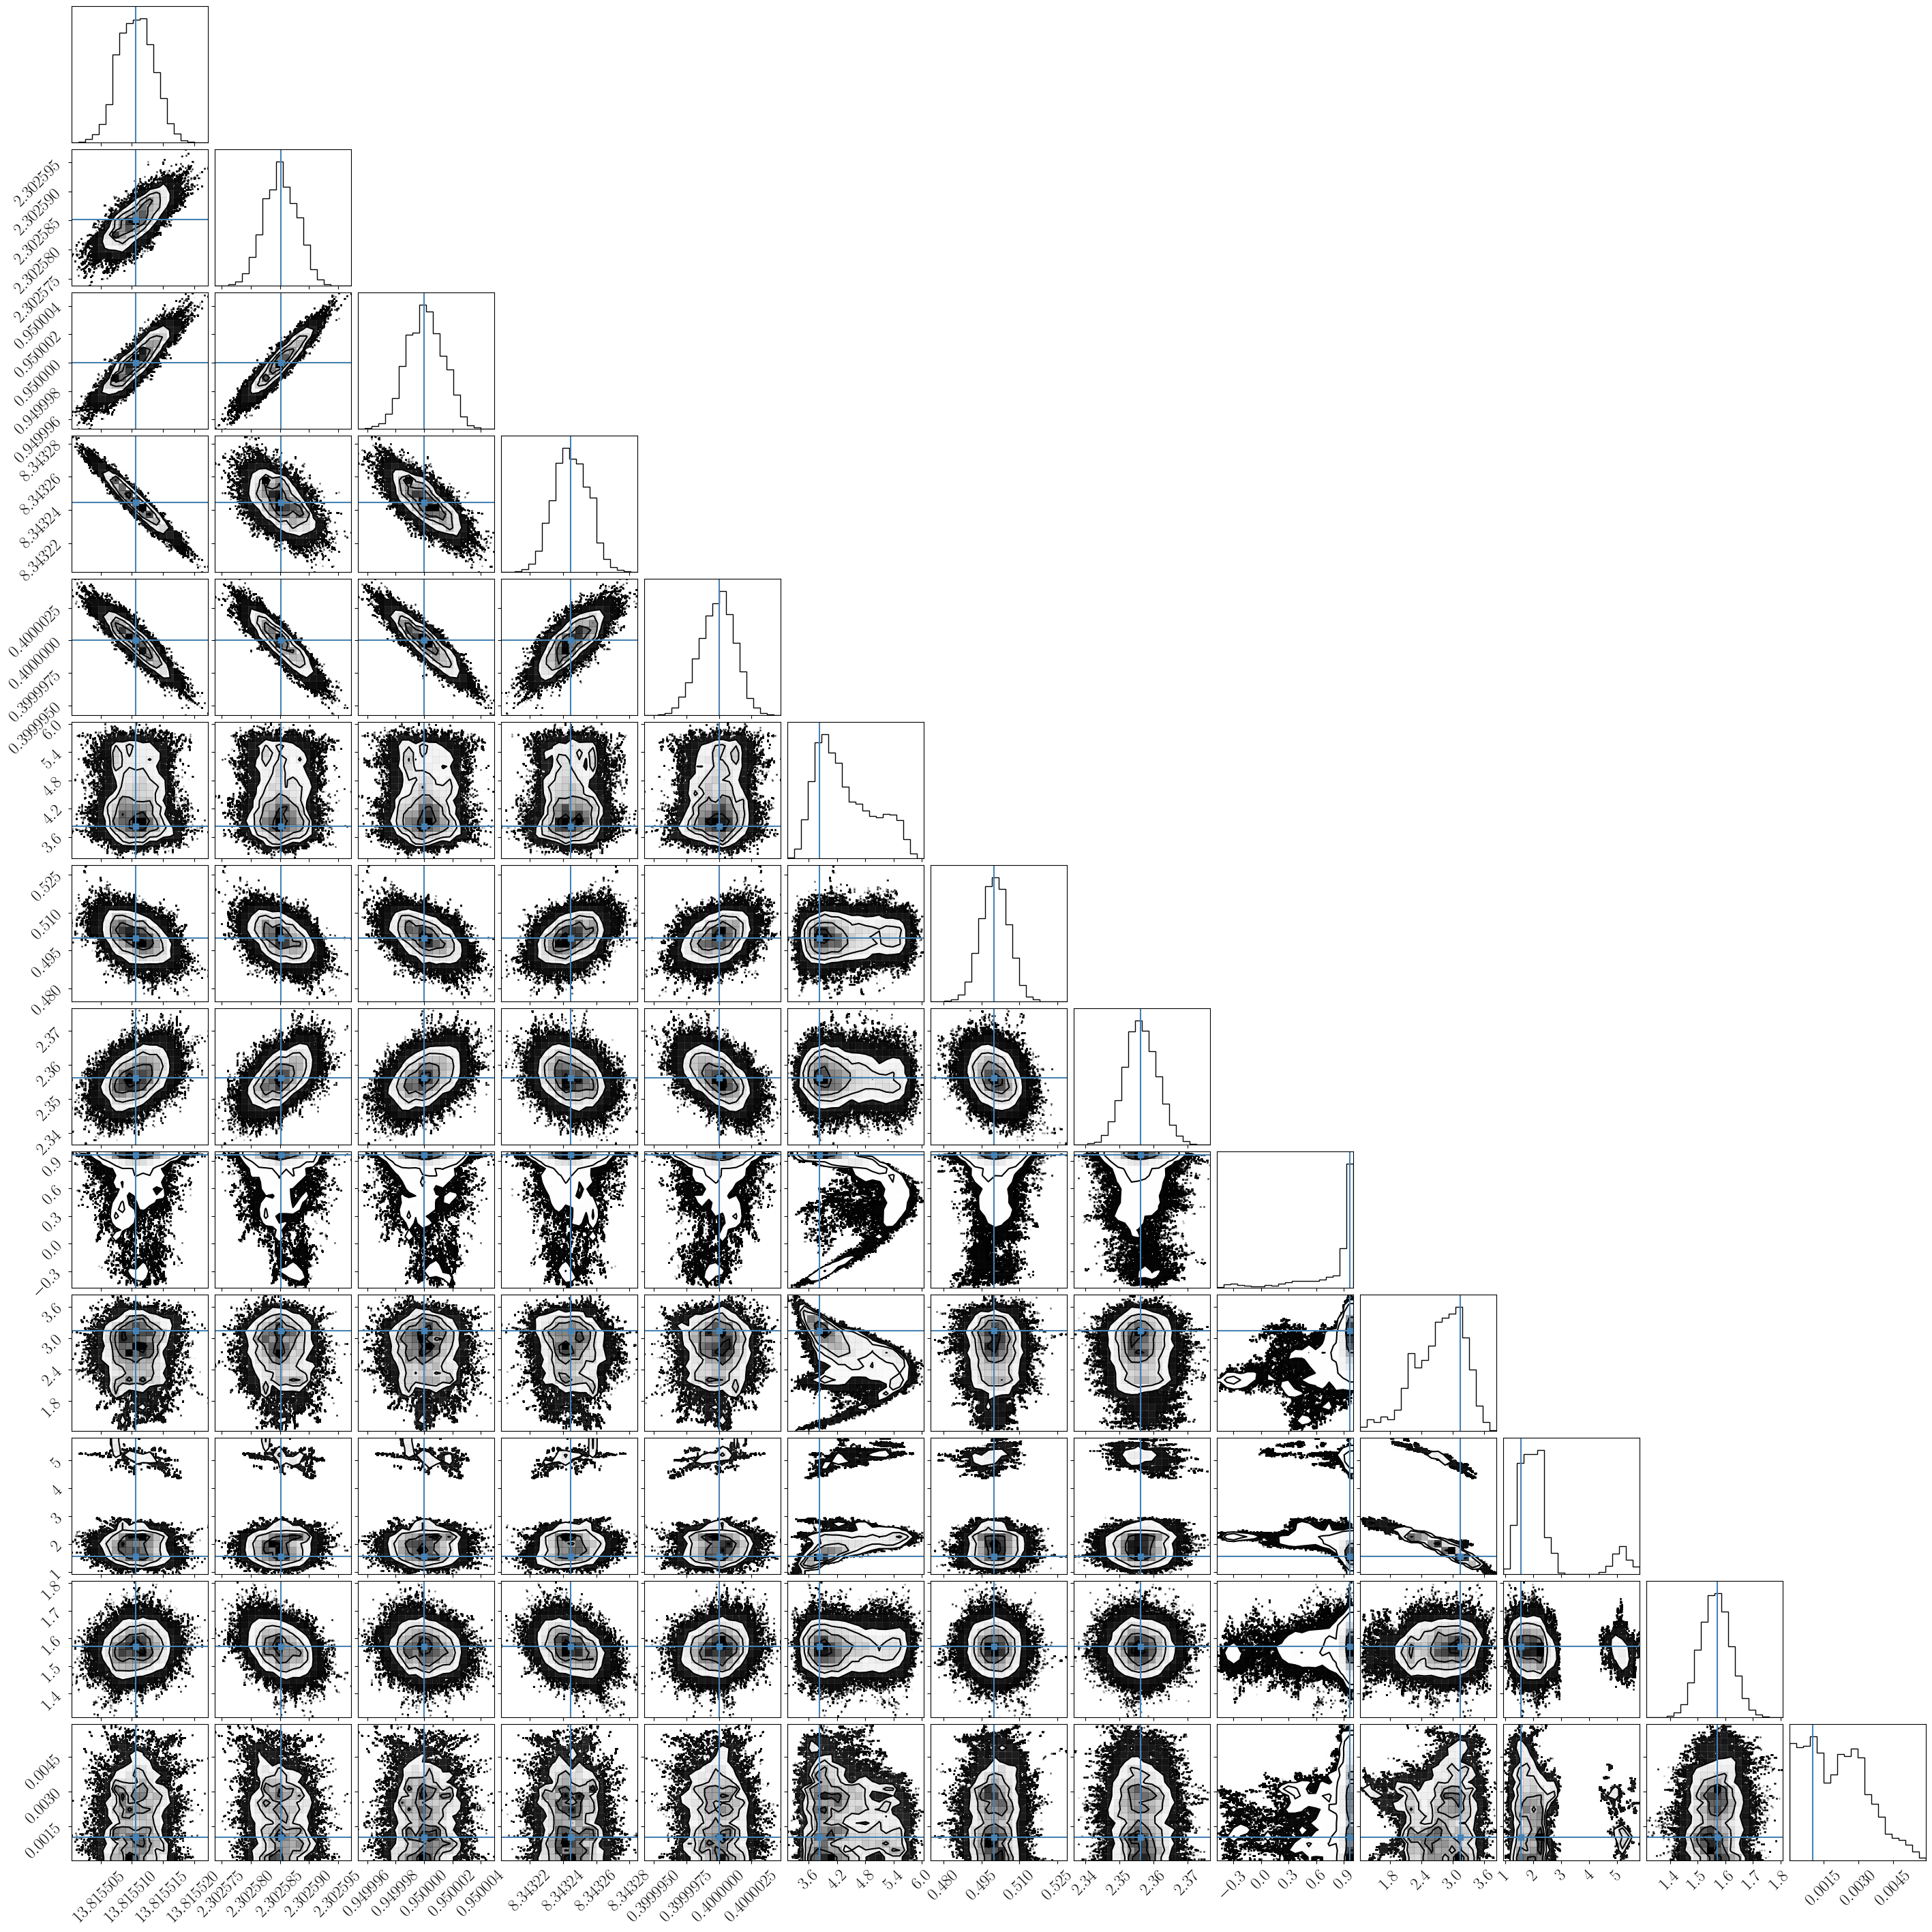

In [87]:
plt.figure(); corner.corner(samp_final[0], truths=inj_pars[0]); plt.show()

In [26]:
datasets,inj_pars

(['results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p1e+01_e0.4_x1.0_T4.0_seed26011996_nw64_nt1.h5',
  'results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p8.3_e0.4_x1.0_T2.0_seed26011996_nw64_nt1.h5',
  'results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p8.4_e0.1_x1.0_T2.0_seed26011996_nw64_nt1.h5',
  'results_mcmc/MCMC_new_M1e+06_mu5.0_a0.95_p1.2e+01_e0.4_x-1.0_T2.0_seed26011996_nw64_nt1.h5',
  'results_mcmc/MCMC_new_M5e+05_mu1e+01_a0.95_p1.2e+01_e0.4_x1.0_T2.0_seed26011996_nw64_nt1.h5',
  'results_mcmc/MCMC_new_M5e+05_mu5.0_a0.95_p1e+01_e0.4_x1.0_T2.0_seed26011996_nw64_nt1.h5'],
 [array([13.81551056,  2.30258509,  0.95      , 10.00907398,  0.4       ,
          3.99599643,  0.5       ,  2.35619449,  0.96592583,  3.14159265,
          1.57079633,  1.57079633,  0.        ]),
  array([13.81551056,  2.30258509,  0.95      ,  8.34324437,  0.4       ,
          3.82423079,  0.5       ,  2.35619449,  0.96592583,  3.14159265,
          1.57079633,  1.57079633,  0.        ]),
  array([13.81551056,  2.30258509,  

In [47]:
inj_pars = np.asarray(inj_pars)
add_T = np.ones(inj_pars.shape[0],dtype=int)*2
# np.hstack((inj_pars,add_T[None,:]))
inj_pars.shape,add_T[:,None].shape
run_vals = np.hstack((inj_pars,add_T[:,None]))
# run_vals[0,-1]=4 # 4 years
# run_vals[0,3]*=-1 # retrograde

In [48]:
inj_pars

array([[1.38155106e+01, 2.30258509e+00, 9.50000000e-01, 1.00090740e+01,
        4.00000000e-01, 3.99599643e+00, 5.00000000e-01, 2.35619449e+00,
        9.65925826e-01, 3.14159265e+00, 1.57079633e+00, 1.57079633e+00,
        0.00000000e+00],
       [1.38155106e+01, 2.30258509e+00, 9.50000000e-01, 8.34324437e+00,
        4.00000000e-01, 3.82423246e+00, 5.00000000e-01, 2.35619449e+00,
        9.65925826e-01, 3.14159265e+00, 1.57079633e+00, 1.57079633e+00,
        1.00000000e-03],
       [1.38155106e+01, 2.30258509e+00, 9.50000000e-01, 8.42427541e+00,
        1.00000000e-01, 3.85237125e+00, 5.00000000e-01, 2.35619449e+00,
        9.65925826e-01, 3.14159265e+00, 1.57079633e+00, 1.57079633e+00,
        0.00000000e+00],
       [1.38155106e+01, 1.60943791e+00, 9.50000000e-01, 1.20426299e+01,
        4.00000000e-01, 1.08792488e+00, 5.00000000e-01, 2.35619449e+00,
        9.65925826e-01, 3.14159265e+00, 1.57079633e+00, 1.57079633e+00,
        0.00000000e+00],
       [1.31223634e+01, 2.30258509e+

[]

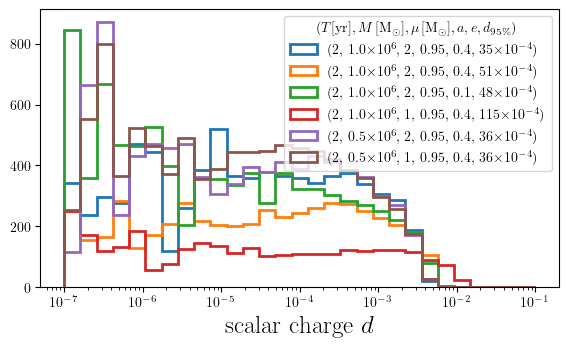

In [49]:
# plt.figure(figsize=(20,10))
plt.figure()
ii = 0
for el,lab,inj in zip(samp_final,run_vals,inj_pars):
    # if (ii != 2):
    d95 = np.quantile(el[:,-1], 0.95)
    Mhere = np.round(np.exp(lab[0]))
    plt.hist(el[:,-1],density=True,bins=np.logspace(-7,-1,num=30),#bins=30,
             label='('+str(int(lab[-1]))+', '+str(Mhere/1e6)+r'$\times 10^{6}$, '+str(int(lab[1]))+', '+str(lab[2])+', '+str(lab[4])+', '+str(int(d95*1e4))+r'$\times 10^{-4}$'+')', 
             # weights=el[:,-1],
             histtype='step', lw=2)
    ii += 1
plt.xlabel('scalar charge $d$',fontsize=18)
plt.legend(title=r'$(T [{\rm yr}], M \, [{\rm M}_\odot], \mu \, [{\rm M}_\odot], a, e, d_{95\%})$')
plt.tight_layout()
plt.semilogx()
# plt.xlim(-0.00001,0.0015)
# plt.savefig('scalar_charge_bounds.pdf')

In [58]:
# len(names_txt[1:]),len(samp_final[1:]),len(names_txt)

In [59]:
names_txt = [ el.split('results_mcmc/')[-1].split('_seed26011996_nw32_nt1.h5')[0] for el in datasets]
print(len(samp_final[1:]),len(names_txt[1:]))
header = 'lnM, mu, a, p0, e0, D_L, costhetaS, phiS, costhetaK, phiK, Phi_phi0, Phi_r0, d'
for nn,ss in zip(names_txt[1:],samp_final[1:]):
    print(nn)
    np.savetxt(nn+'.txt',ss,header=header)

4 4
MCMC_adaptive_M1e+06_mu1e+01_a0.95_p8.3_e0.4_x1.0_T2.0
MCMC_adaptive_M1e+06_mu1e+01_a0.95_p8.4_e0.1_x1.0_T2.0
MCMC_adaptive_M5e+05_mu1e+01_a0.95_p1.2e+01_e0.4_x1.0_T2.0
MCMC_adaptive_M5e+05_mu5.0_a0.95_p1e+01_e0.4_x1.0_T2.0


In [60]:
datasets

['results_mcmc/MCMC_adaptive_M1e+06_mu1e+01_a0.95_p1e+01_e0.4_x1.0_T4.0_seed26011996_nw32_nt1.h5',
 'results_mcmc/MCMC_adaptive_M1e+06_mu1e+01_a0.95_p8.3_e0.4_x1.0_T2.0_seed26011996_nw32_nt1.h5',
 'results_mcmc/MCMC_adaptive_M1e+06_mu1e+01_a0.95_p8.4_e0.1_x1.0_T2.0_seed26011996_nw32_nt1.h5',
 'results_mcmc/MCMC_adaptive_M5e+05_mu1e+01_a0.95_p1.2e+01_e0.4_x1.0_T2.0_seed26011996_nw32_nt1.h5',
 'results_mcmc/MCMC_adaptive_M5e+05_mu5.0_a0.95_p1e+01_e0.4_x1.0_T2.0_seed26011996_nw32_nt1.h5']

In [61]:
import zipfile
# List of files to be zipped
files_to_zip = [nn+'.txt' for nn,ss in zip(names_txt[1:],samp_final[1:])]

# Name of the output ZIP archive
output_zip_name = 'samples_different_runs.zip'

# Open the output ZIP archive in write mode
with zipfile.ZipFile(output_zip_name, 'w') as zipf:
    # Add each file to the archive
    for file in files_to_zip:
        zipf.write(file)

# Remove the original files
# for file in files_to_zip:
#     os.remove(file)

print(f'Successfully created {output_zip_name}')


Successfully created samples_different_runs.zip


In [62]:
# !rm MCMC*.txt

In [63]:
# zip compressed_archive.zip MCMC_M1e+06_mu1e+01_p8.5_e0.1_x1.0_T2.0.txt MCMC_M1e+06_mu1e+01_p8.5_e0.4_x1.0_T2.0.txt MCMC_M1e+06_mu5e+01_p1.3e+01_e0.4_x1.0_T2.0.txt

# Map to theory
The mapping between the scalar charge d and the coupling constant $\alpha$ is
$$
y = \sqrt{\alpha} 
$$
$$
d = \frac{y^2}{2 \mu^2} 
$$
$$
\sqrt{2 \, d} \mu = y 
$$
$$
\frac{\mu}{\sqrt{d}} {\rm d} d = {\rm d} y = y \, {\rm d} \log y 
$$

In [38]:
import matplotlib as mpl

default_width = 5.78853 # in inches
default_ratio = (np.sqrt(5.0) - 1.0) / 2.0 # golden mean

mpl.rcParams.update({
    "text.usetex": True,
    "pgf.texsystem": 'pdflatex',
    "pgf.rcfonts": False,
    "font.family": "serif",
    "figure.figsize": [default_width, default_width * default_ratio],
})
mpl.rcParams.update({
    "text.usetex": True,
    "pgf.texsystem": 'pdflatex',
    "pgf.rcfonts": False,
    "font.family": "serif",
    "figure.figsize": [default_width, default_width * default_ratio],
  'legend.fontsize': 18,
  'xtick.labelsize': 18,
  'ytick.labelsize': 18,
# "axes.formatter.min_exponent": 1
"axes.formatter.offset_threshold": 10
})


In [39]:
names_txt = [ el.split('results_mcmc/')[-1] for el in datasets]
names_txt

['MCMC_new_M1e+06_mu1e+01_a0.95_p1e+01_e0.4_x1.0_T4.0_seed26011996_nw64_nt1.h5',
 'MCMC_new_M1e+06_mu1e+01_a0.95_p8.3_e0.4_x1.0_T2.0_seed26011996_nw64_nt1.h5',
 'MCMC_new_M1e+06_mu1e+01_a0.95_p8.4_e0.1_x1.0_T2.0_seed26011996_nw64_nt1.h5',
 'MCMC_new_M5e+05_mu1e+01_a0.95_p1.2e+01_e0.4_x1.0_T2.0_seed26011996_nw64_nt1.h5',
 'MCMC_new_M5e+05_mu5.0_a0.95_p1e+01_e0.4_x1.0_T2.0_seed26011996_nw64_nt1.h5']

In [40]:
import re

# Example string
input_string = names_txt[0]

def get_pars(input_string):
    # Define regular expressions for each parameter
    pattern_M = re.compile(r'M(\d+\.?\d*)')
    pattern_mu = re.compile(r'mu(\d+\.?\d*)')
    pattern_a = re.compile(r'a(\d+\.?\d*)')
    pattern_p = re.compile(r'p(\d+\.?\d*)')
    pattern_e = re.compile(r'e(\d+\.?\d*)')
    pattern_T = re.compile(r'T(\d+\.?\d*)')
    
    # Function to extract parameter values
    def extract_parameter_value(pattern, input_string):
        match = pattern.search(input_string)
        return float(match.group(1)) if match else None
    
    # Extract parameter values
    M_value = extract_parameter_value(pattern_M, input_string)
    mu_value = extract_parameter_value(pattern_mu, input_string)
    a_value = extract_parameter_value(pattern_a, input_string)
    p_value = extract_parameter_value(pattern_p, input_string)
    e_value = extract_parameter_value(pattern_e, input_string)
    T_value = extract_parameter_value(pattern_T, input_string)
    return M_value, mu_value, a_value, p_value, e_value, T_value

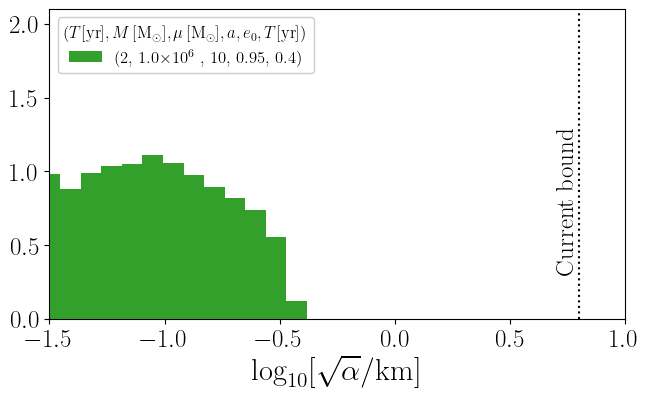

In [51]:
from scipy.constants import golden
inv_golden = 1. / golden

px = 0.0132
cud_colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3']
linestyle_str = ['dashed','solid',(0, (1, 1)),'dashdot',(5, (10, 3)),(0, (3, 1, 1, 1, 1, 1))]

f, ax = plt.subplots(1, 1, figsize=(500.0*px, inv_golden * 500.0*px))
for el,lab,inj,cl,lst in zip(samp_final[1:2],names_txt[1:2],inj_pars[1:2],cud_colors[1:2],linestyle_str[1:2]):
    
    mu = el[:,1]
    d = el[:,-1]
    w = mu / np.sqrt(d)
    y = np.sqrt(2*d)*mu*MRSUN_SI/1e3

    d95 = np.quantile(y, 0.95)
    M_value, mu_value, a_value, p_value, e_value, T_value = get_pars(lab)
    M_value = int(np.round(np.exp(inj[0])))
    mu_value = int(np.round(np.exp(inj[1])))
    a_value = inj[2]
    if 'x-1.0' in lab:
        a_value *= -1
    p_value = inj[3]
    e_value = inj[4]
    plt.hist( np.log10(y),weights=w/y, bins=np.linspace(-1.5,-0.25,num=15) + np.random.uniform(-0.05,0.0),#bins=10**np.linspace(-1.5,0.5,num=30),
             density=True, color = cl, linestyle=lst,
             label='('+str(int(T_value))+', '+str(M_value/1e6)+r'$\times 10^6$ '+r', '+str(mu_value)+', '+str(a_value)+', '+str(e_value)+')', 
            #  histtype='step', 
             lw=3)
    
    y95 = np.quantile(np.log10(y), 0.95)
    # plt.axvline(y95,color = cl,linestyle='-')

plt.xlabel(r'$\log_{10} [\sqrt{\alpha} / {\rm km} ]$',size=22)
plt.ylim(0,2.1)
plt.xlim(-1.5,1.0)
plt.tight_layout()
vpos = 0.8
plt.axvline(vpos,color='k',linestyle=':')
# plt.axvline(0.8/np.sqrt(1000),label='current bound for 1000 events',color='k',linestyle='--')
# Add text next to the vertical line
text_position = (vpos - 0.1, vpos)  # Adjust the position as needed
plt.text(*text_position, 'Current bound', verticalalignment='center', fontsize=18, rotation='vertical')

legend = plt.legend(title=r'$(T [{\rm yr}], M \, [{\rm M}_\odot], \mu \, [{\rm M}_\odot], a, e_0, T [{\rm yr}])$',framealpha=1.0,ncol=2,loc='upper left',fontsize=12)
legend.get_title().set_fontsize('12')

plt.savefig('alpha_bounds.pdf')

In [117]:
def get_transform(el):
    mu = el[:,1]
    d = el[:,-1]
    w = mu / np.sqrt(d)
    y = np.sqrt(2*d)*mu*MRSUN_SI/1e3
    # print(y.shape)
    maxnum = 1000
    return y[:maxnum], (w/y)[:maxnum]

dat = np.asarray([get_transform(el) for el in samp_final])
dat.shape

(6, 2, 1000)

In [181]:
import numpy as np
import matplotlib as mpl

import kalepy as kale

from kalepy.plot import nbshow

def get_kde(data,weights):

    points, pdf_basic = kale.density(data, reflect=[-1.5, 0.0], probability=True, weights=weights)
    plt.plot(points, pdf_basic, 'b-', lw=3.0, alpha=0.5, label='Reflecting KDE')


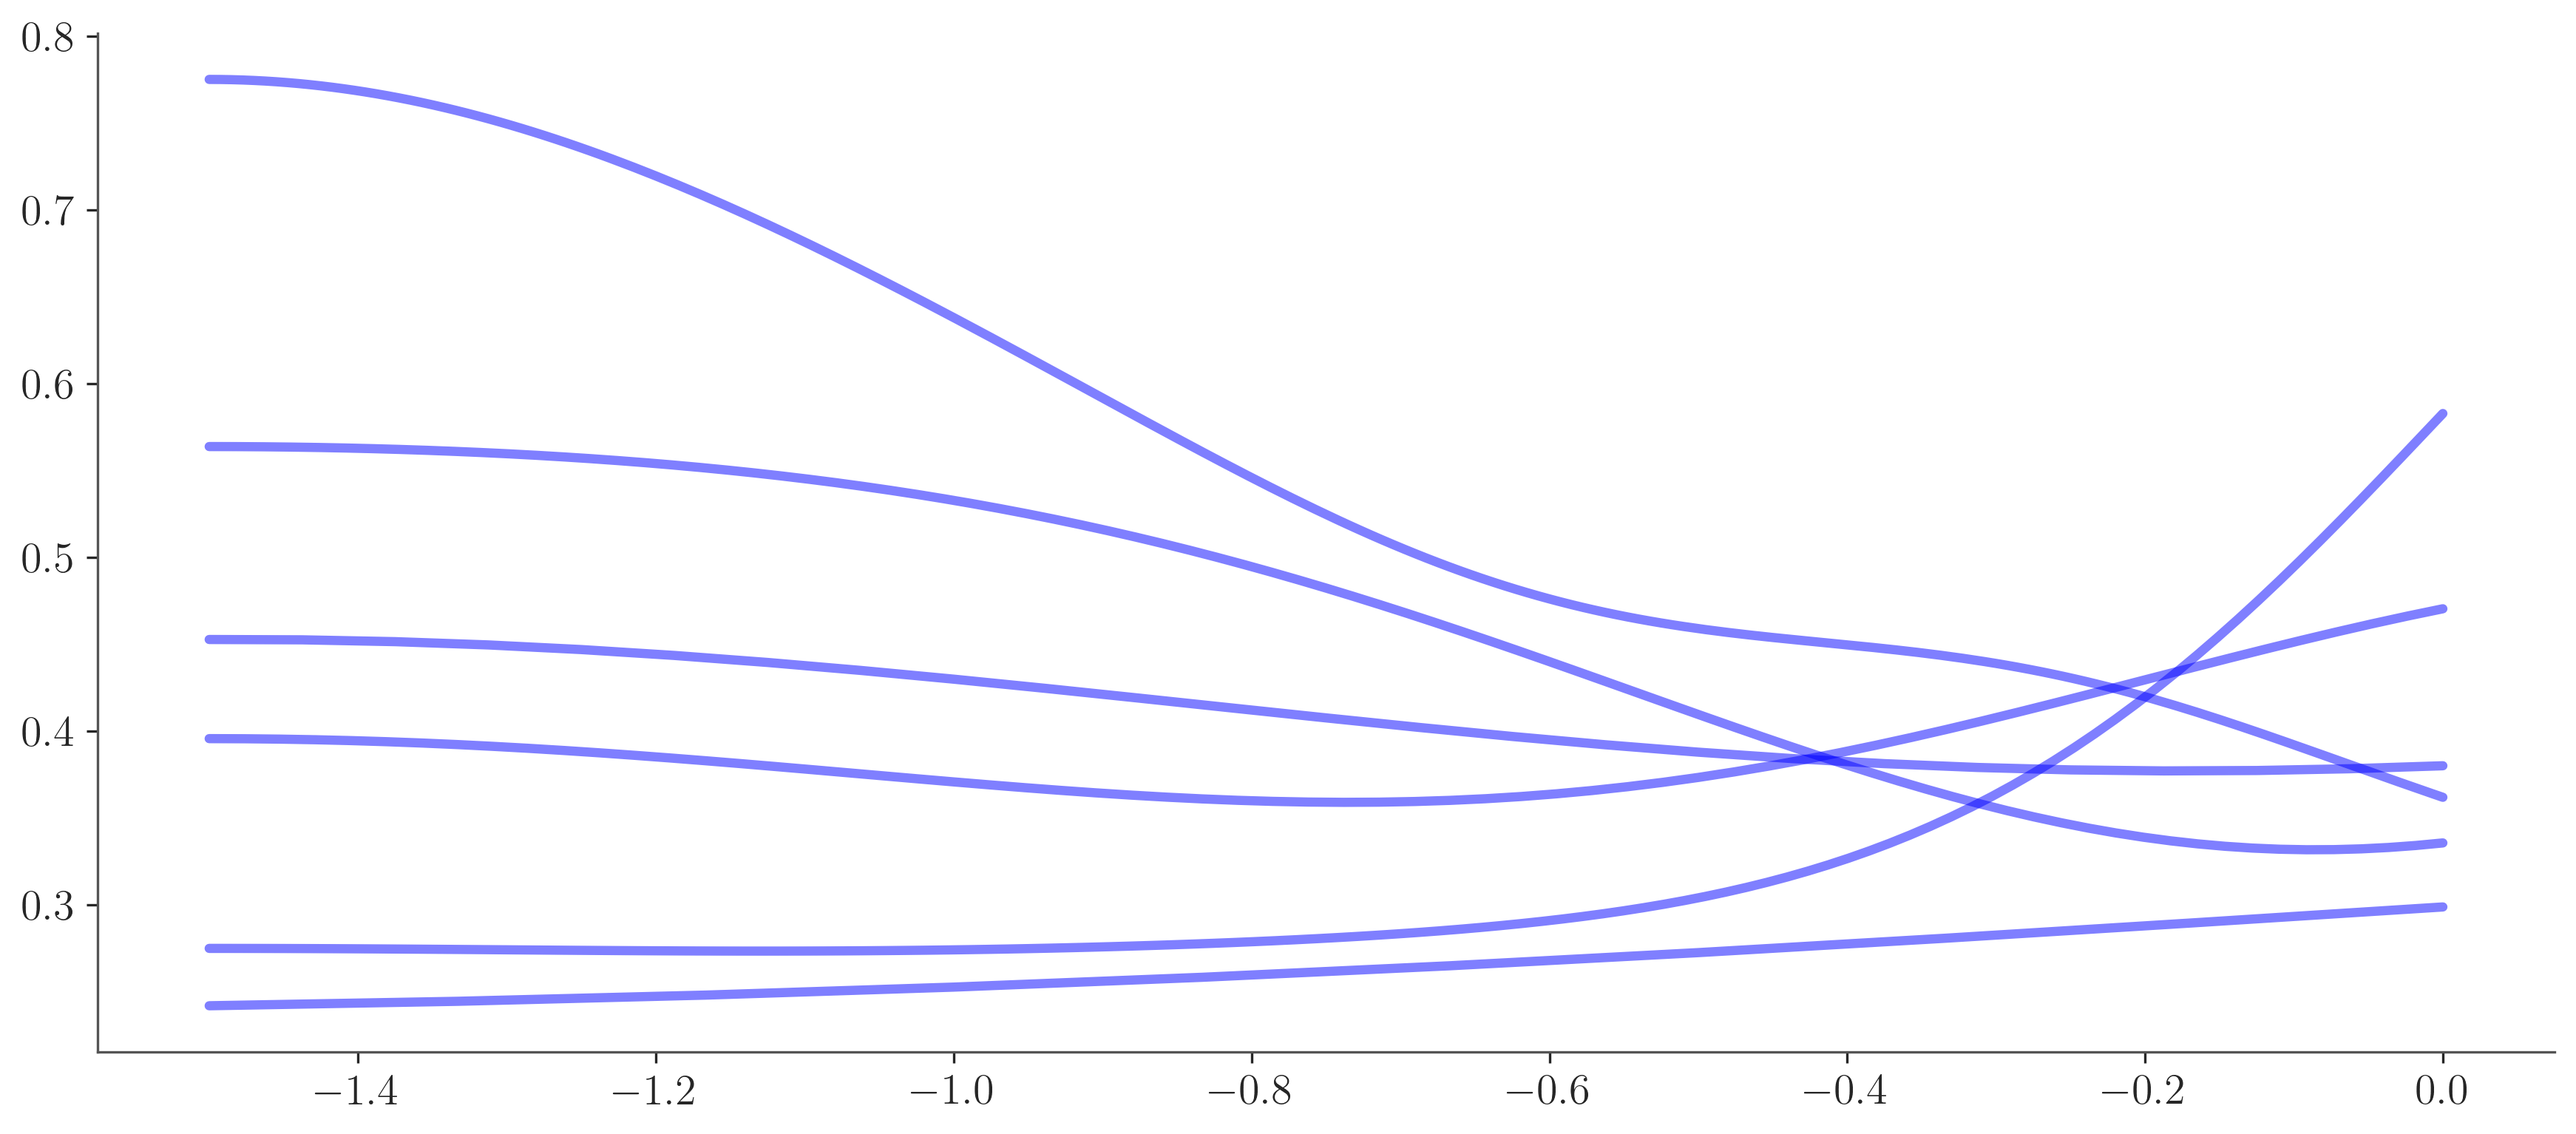

In [183]:
from scipy.constants import golden
inv_golden = 1. / golden

px = 0.0132
cud_colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3']
linestyle_str = ['dashed','solid',(0, (1, 1)),'dashdot',(0, (3, 5, 1, 5, 1, 5)),(5, (10, 3))]

# f, ax = plt.subplots(1, 1, figsize=(500.0*px, inv_golden * 500.0*px))
for el,lab,inj,cl,lst in zip(samp_final,names_txt,inj_pars,cud_colors,linestyle_str):
    
    mu = el[:,1]
    d = el[:,-1]
    w = mu / np.sqrt(d)
    y = np.sqrt(2*d)*mu*MRSUN_SI/1e3

    d95 = np.quantile(y, 0.95)
    M_value, mu_value, a_value, p_value, e_value, T_value = get_pars(lab)
    M_value = int(np.round(np.exp(inj[0])))
    mu_value = int(np.round(np.exp(inj[1])))
    a_value = inj[2]
    if 'x-1.0' in lab:
        a_value *= -1
    p_value = inj[3]
    e_value = inj[4]

    points, pdf_basic = kale.density(np.log10(y), reflect=[-1.5, 0.0], probability=True, weights=w/y)
    plt.plot(points, pdf_basic, 'b-', lw=3.0, alpha=0.5, label='Reflecting KDE')

# plt.xlabel(r'$\log_{10} \sqrt{\alpha} / {\rm km} $',size=18)
# plt.ylim(0,2.1)
# plt.xlim(-1.8,1.0)
# plt.tight_layout()
# vpos = 0.8
# plt.axvline(vpos,color='k',linestyle=':')
# # plt.axvline(0.8/np.sqrt(1000),label='current bound for 1000 events',color='k',linestyle='--')
# # Add text next to the vertical line
# text_position = (vpos - 0.1, vpos)  # Adjust the position as needed
# plt.text(*text_position, 'LVK bound', verticalalignment='center', fontsize=14, rotation='vertical')

# legend = plt.legend(title=r'$(T [{\rm yr}], M \, [{\rm M}_\odot], \mu \, [{\rm M}_\odot], a, e_0, T [{\rm yr}])$',framealpha=1.0,ncol=2,loc='upper left',fontsize=12)
# legend.get_title().set_fontsize('12')

# plt.savefig('alpha_bounds.pdf')


# Full corner plot

In [74]:
mpl.rcParams.update({
    "text.usetex": True,
    "pgf.texsystem": 'pdflatex',
    "pgf.rcfonts": False,
    "font.family": "serif",
    "figure.figsize": [default_width, default_width * default_ratio],
  'legend.fontsize': 40,
  'xtick.labelsize': 20,
  'ytick.labelsize': 20,
# "axes.formatter.min_exponent": 1
"axes.formatter.offset_threshold": 10
})



In [75]:
inj_pars[0]

array([13.81551056,  2.30258509,  0.95      , 10.00907398,  0.4       ,
        3.99599643,  0.5       ,  2.35619449,  0.96592583,  3.14159265,
        1.57079633,  1.57079633,  0.        ])

In [76]:
truths = inj_pars[0]

CORNER_KWARGS = dict(
#     smooth=0.6,
    labels=[r'$\log (M/{\rm M}_\odot$)', r'$\mu / M_{\odot}$', r'$a$', r'$p_0 \, [M]$', r'$e_0$', 
            r'$D_L$',
            r"$\cos \theta_S$",r"$\phi_S$",
            r"$\cos \theta_K$",r"$\phi_K$",
           r'$\Phi_{\varphi 0}$', r'$\Phi_{r 0}$',
            r"$d$",
            # 'log-likelihood'
           ],
    bins=40,
    truths = truths,
    label_kwargs=dict(fontsize=35),
#     title_kwargs=dict(fontsize=13),
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
    plot_density=False,
    plot_datapoints=False,
    fill_contours=False,
    show_titles=False,
    max_n_ticks=4,
    truth_color='k',
    labelpad=0.3,
)
import matplotlib.lines as mlines

def get_normalisation_weight(len_current_samples, len_of_longest_samples):
    return np.ones(len_current_samples) * (len_of_longest_samples / len_current_samples)


def overlaid_corner(samples_list, sample_labels, name_save=None, corn_kw=CORNER_KWARGS):
    """Plots multiple corners on top of each other"""
    # get some constants
    n = len(samples_list)
    _, ndim = samples_list[0].shape
    max_len = max([len(s) for s in samples_list])
    cmap = plt.cm.get_cmap('Set1',)
    colors = [cmap(i) for i in range(n)]#['black','red', 'royalblue']#

    plot_range = []
    for dim in range(ndim):
        plot_range.append(
            [
                min([min(samples_list[i].T[dim]) for i in range(n)]),
                max([max(samples_list[i].T[dim]) for i in range(n)]),
            ]
        )

    CORNER_KWARGS.update(range=plot_range)
    fig = corner.corner(
        samples_list[0],
        color=colors[0],
        weights=get_normalisation_weight(len(samples_list[0]), max_len),
        **CORNER_KWARGS
    )

    for idx in range(1, n):
        fig = corner.corner(
            samples_list[idx],
            fig=fig,
            weights=get_normalisation_weight(len(samples_list[idx]), max_len),
            color=colors[idx],
            **CORNER_KWARGS
        )

    plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=sample_labels[i])
            for i in range(n)
        ],
        fontsize=35, frameon=False,
        bbox_to_anchor=(0.5, ndim+1), 
        loc="upper right"
    )
    
#     fig.subplots_adjust(right=1.0,top=1.0)

    plt.subplots_adjust(left=-0.1, bottom=-0.1, right=None, top=None, wspace=None, hspace=0.15)

    if name_save is not None:
        plt.savefig(name_save+".pdf", pad_inches=0.2, bbox_inches='tight')
    else:
        plt.show()


In [78]:
name_mcmc = [el.split('downsample1_')[-1].split('.h5')[0] for el in datasets]
name_mcmc

['results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p1e+01_e0.4_x1.0_T4.0_seed26011996_nw64_nt1',
 'results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p8.3_e0.4_x1.0_T2.0_seed26011996_nw64_nt1',
 'results_mcmc/MCMC_new_M1e+06_mu1e+01_a0.95_p8.4_e0.1_x1.0_T2.0_seed26011996_nw64_nt1',
 'results_mcmc/MCMC_new_M1e+06_mu5.0_a0.95_p1.2e+01_e0.4_x-1.0_T2.0_seed26011996_nw64_nt1',
 'results_mcmc/MCMC_new_M5e+05_mu1e+01_a0.95_p1.2e+01_e0.4_x1.0_T2.0_seed26011996_nw64_nt1',
 'results_mcmc/MCMC_new_M5e+05_mu5.0_a0.95_p1e+01_e0.4_x1.0_T2.0_seed26011996_nw64_nt1']

/tmp/ipykernel_3363980/2952301036.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1',)


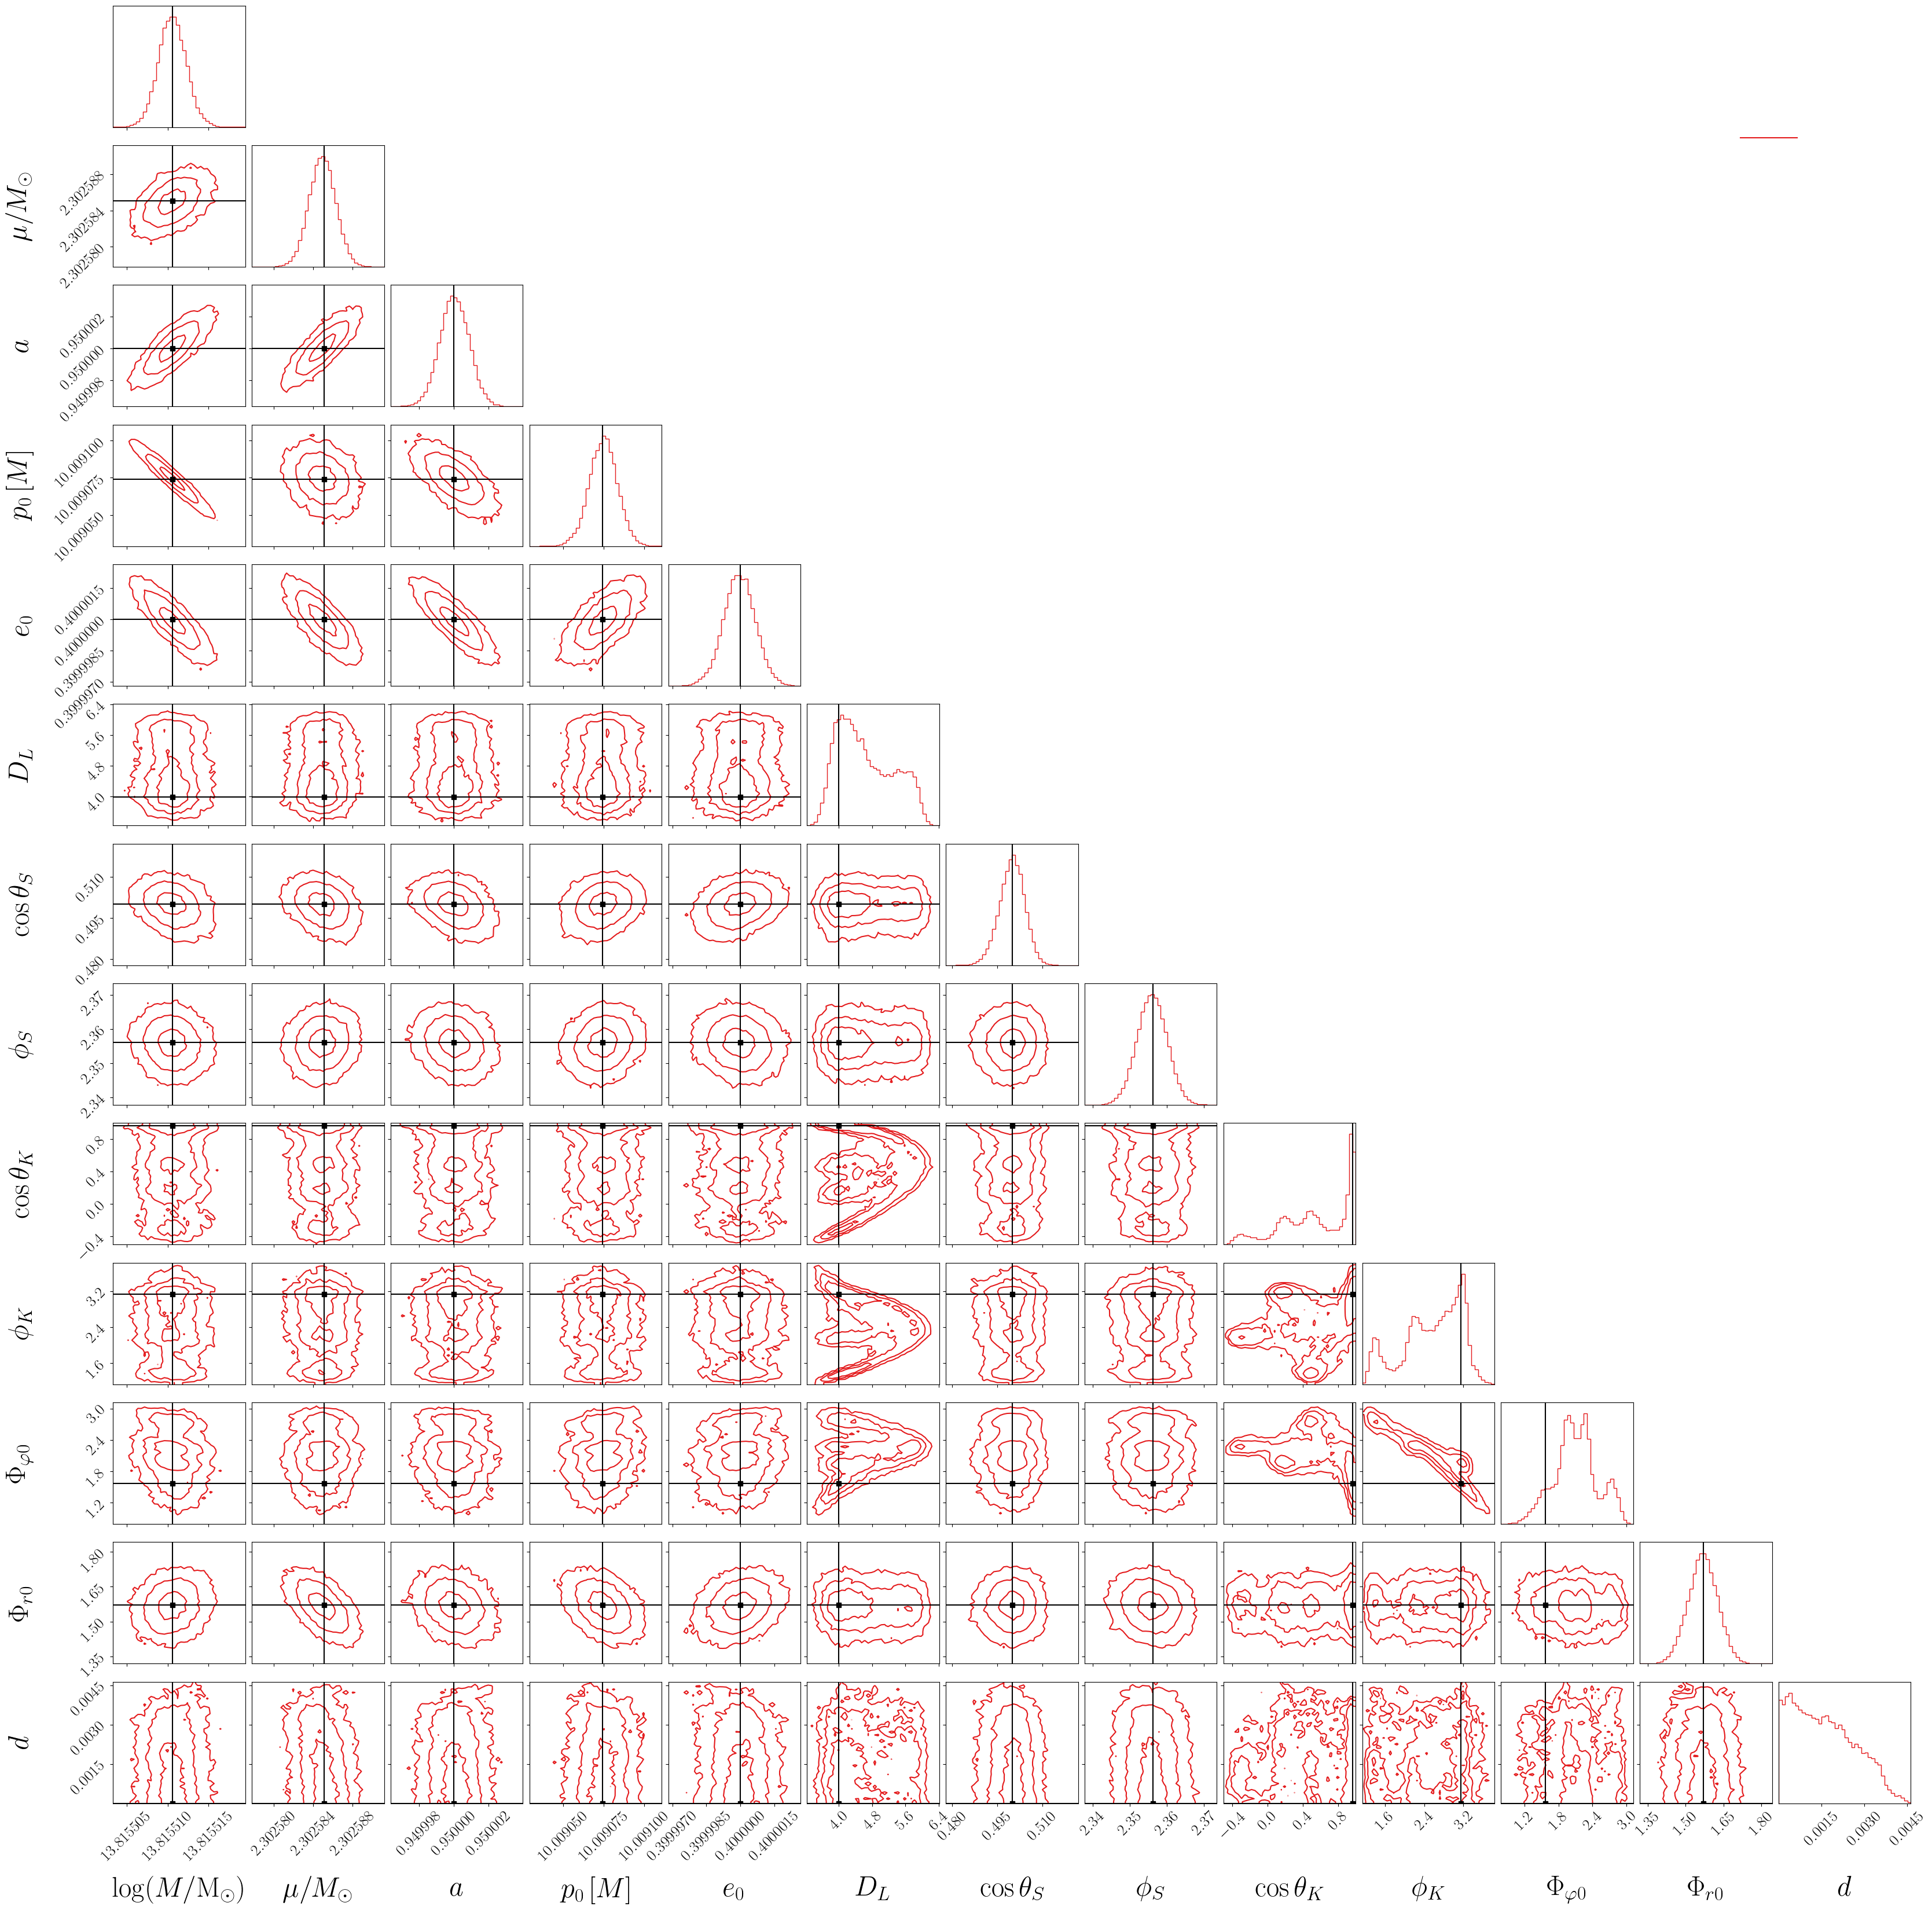

In [79]:
overlaid_corner([samp_final[0]], [" "],name_save=name_mcmc[0]+'_posteriors.pdf')

In [39]:
from scipy.stats import entropy
set_num = [[0,1],[0,2],[2,1]]
for ii in range(3):
    for var in range(6):
        bins = np.linspace(samp_final[0][:,var].min(),samp_final[0][:,var].max(),num=20)
        counts1,_ = np.histogram(samp_final[set_num[ii][0]][:,var],bins=bins)
        counts2,_ = np.histogram(samp_final[set_num[ii][1]][:,var],bins=bins)
        print(entropy(counts2,qk=counts1))

7.511629491187708e-05
0.00022136145317279798
0.0002133622926115147
0.00012687262007742486
0.00010547404460524276
0.00012788585227911471
0.0003895700901878787
8.259397263103794e-05
6.820638703927235e-05
0.00027832986979116873
9.609976264535623e-05
6.874366367275577e-05
0.0002418487936459391
0.00015093808003734184
0.0001859957684406602
0.00012475519282710554
0.0001129106530749433
0.00011284880805310517


# Downsampled

In [40]:
CORNER_KWARGS

{'labels': ['$\\log (M/{\\rm M}_\\odot$)',
  '$\\log (\\mu / M)$',
  '$p_0 \\, [M]$',
  '$e_0$',
  '$\\Phi_{\\varphi 0}$',
  '$\\Phi_{r 0}$',
  'log-likelihood'],
 'bins': 40,
 'truths': [15.115713592242255,
  -9.438760095027266,
  13.709101864726545,
  0.5794130830706371,
  1.0471975511965976,
  1.0471975511965976,
  0.0],
 'label_kwargs': {'fontsize': 35},
 'levels': (0.3934693402873666, 0.8646647167633873, 0.9888910034617577),
 'plot_density': False,
 'plot_datapoints': False,
 'fill_contours': False,
 'show_titles': False,
 'max_n_ticks': 4,
 'truth_color': 'k',
 'labelpad': 0.3,
 'range': [[15.115687267052175, 15.115739420764386],
  [-9.438829404512905, -9.438693633194458],
  [13.708922936633092, 13.709292113991944],
  [0.5793977942631167, 0.5794294904687305],
  [0.7730447739530297, 1.301019219849867],
  [0.9310958033331248, 1.1544861185232909],
  [-19.591033041293453, -0.02952779622263154]]}

In [41]:
lst = ['solid','dashed','dashdot']
CORNER_KWARGS = dict(
#     smooth=0.6,
    labels=[r'$\log (M/{\rm M}_\odot$)', r'$\log (\mu / M)$', r'$p_0 \, [M]$', r'$e_0$', 
           r'$\Phi_{\varphi 0}$', r'$\Phi_{r 0}$','log-likelihood'
           ],
    bins=40,
    truths = truths,
    label_kwargs=dict(fontsize=35),
#     title_kwargs=dict(fontsize=13),
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
    plot_density=False,
    plot_datapoints=False,
    fill_contours=False,
    show_titles=False,
    max_n_ticks=4,
    truth_color='k',
    labelpad=0.3,
)

def overlaid_corner(samples_list, sample_labels, name_save=None, corn_kw=CORNER_KWARGS):
    """Plots multiple corners on top of each other"""
    # get some constants
    n = len(samples_list)
    _, ndim = samples_list[0].shape
    max_len = max([len(s) for s in samples_list])
    cmap = plt.cm.get_cmap('tab10',)
    colors = [cmap(i) for i in range(n)]#['black','red', 'royalblue']#

    plot_range = []
    for dim in range(ndim):
        plot_range.append(
            [
                min([min(samples_list[i].T[dim]) for i in range(n)]),
                max([max(samples_list[i].T[dim]) for i in range(n)]),
            ]
        )

    CORNER_KWARGS.update(range=plot_range)
    
    fig = corner.corner(
        samples_list[0],
        color=colors[0],
        weights=get_normalisation_weight(len(samples_list[0]), max_len),
        **CORNER_KWARGS
    )

    for idx in range(1, n):
        
        
        CORNER_KWARGS['contour_kwargs'] = {"linestyles":lst[idx],"color":colors[idx],"linewidths":2}
        CORNER_KWARGS['hist_kwargs'] = {"ls":lst[idx],"color":colors[idx]}

        fig = corner.corner(
            samples_list[idx],
            fig=fig,
            weights=get_normalisation_weight(len(samples_list[idx]), max_len),
            color=colors[idx],
            **CORNER_KWARGS
        )

    leg=plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=sample_labels[i],linestyle=lst[i])
            for i in range(n)
        ],
        fontsize=35, frameon=False,
        bbox_to_anchor=(0.5, ndim+1.0), 
        loc="upper right",
        title=r'$(f_{\rm max} \, [\rm{mHz}], N_f,\rm{likelihood} \, \rm{speed} \{\rm{CPU,GPU}\} \,[\rm{s}])=$',
        title_fontsize=35,
    )

    plt.subplots_adjust(left=-0.1, bottom=-0.1, right=None, top=None, wspace=None, hspace=0.15)

    if name_save is not None:
        plt.savefig(name_save+".pdf", pad_inches=0.2, bbox_inches='tight')
    else:
        plt.show()



In [42]:
datasets = sorted(glob.glob('results/downsampled_mcmc/*.h5'))+ glob.glob('results/MCMC_*window_flagFalse*.h5')
datasets
downsample_value = np.asarray([datasets[ii].split('_downsample')[1].split('_inject')[0] for ii in range(len(datasets))],dtype=int)
datasets = [datasets[ii] for ii in np.argsort(downsample_value)]
datasets

['results/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps0.01_seed2601996_nw32_nt1_downsample0_injectFD1_usegpuTrue_templatefd_window_flagFalse.h5',
 'results/downsampled_mcmc/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps0.01_seed2601996_nw32_nt2_downsample1_injectFD1_usegpuTrue_templatefd_window_flagFalse.h5',
 'results/downsampled_mcmc/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps0.01_seed2601996_nw32_nt2_downsample10_injectFD1_usegpuTrue_templatefd_window_flagFalse.h5',
 'results/downsampled_mcmc/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps0.01_seed2601996_nw32_nt2_downsample100_injectFD1_usegpuFalse_templatefd_window_flagFalse.h5',
 'results/downsampled_mcmc/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps0.01_seed2601996_nw32_nt2_downsample1000_injectFD1_usegpuTrue_templatefd_window_flagFalse.h5',
 'results/downsampled_mcmc/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps0.01_seed2601996_nw32_nt2_downsample10000_injectFD1_usegpuTrue_templatefd_window_flagFalse.h5']

results/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps0.01_seed2601996_nw32_nt1_downsample0_injectFD1_usegpuTrue_templatefd_window_flagFalse.h5
{'StretchMove_0': {'acceptance_fraction': array([[0.40970007, 0.41007648, 0.4101183 , 0.41065304, 0.41119376,
        0.40929677, 0.40924897, 0.41081138, 0.41074565, 0.4118241 ,
        0.40965824, 0.4108771 , 0.4094073 , 0.41003465, 0.4109249 ,
        0.41003764, 0.41153731, 0.40991217, 0.41086216, 0.40987632,
        0.40914142, 0.41128338, 0.41001075, 0.40929378, 0.40811973,
        0.41033339, 0.41082333, 0.41015116, 0.41031248, 0.41046783,
        0.41093983, 0.40933262]])}}


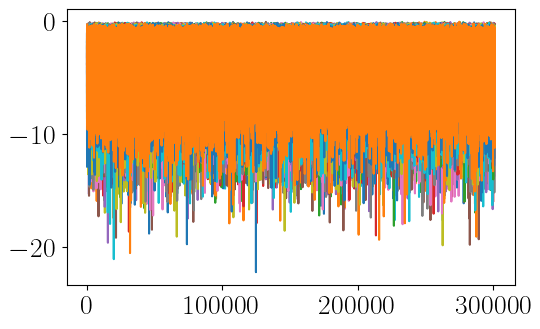

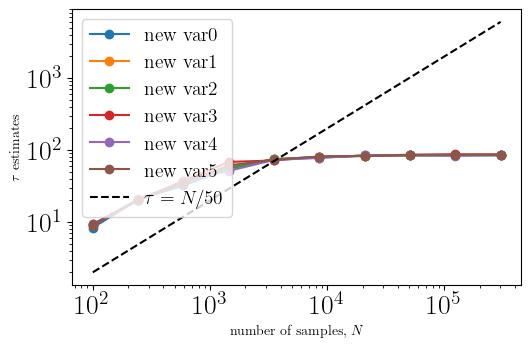

results/downsampled_mcmc/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps0.01_seed2601996_nw32_nt2_downsample1_injectFD1_usegpuTrue_templatefd_window_flagFalse.h5
{'StretchMove_0': {'acceptance_fraction': array([[0.40845315, 0.41289304, 0.41015279, 0.41696873, 0.41193916,
        0.41336131, 0.41245946, 0.41053435, 0.40928563, 0.4087133 ,
        0.41029154, 0.40916422, 0.41001405, 0.40926828, 0.40907751,
        0.41070778, 0.40909485, 0.40952843, 0.41561595, 0.41254618,
        0.40692693, 0.40925094, 0.40838377, 0.40588633, 0.40708302,
        0.40798488, 0.41145355, 0.41032623, 0.41601485, 0.4123554 ,
        0.41077716, 0.41056904],
       [0.26337606, 0.26811079, 0.26238749, 0.26108673, 0.26035831,
        0.26476352, 0.26429525, 0.26295982, 0.26342809, 0.26665395,
        0.26384433, 0.26648051, 0.26245686, 0.26514508, 0.26341074,
        0.26464212, 0.2640351 , 0.26594287, 0.26346277, 0.26294247,
        0.26382698, 0.26306388, 0.257514  , 0.26374027, 0.26570006,
        0.26044

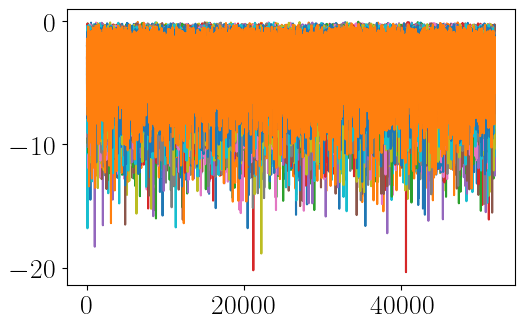

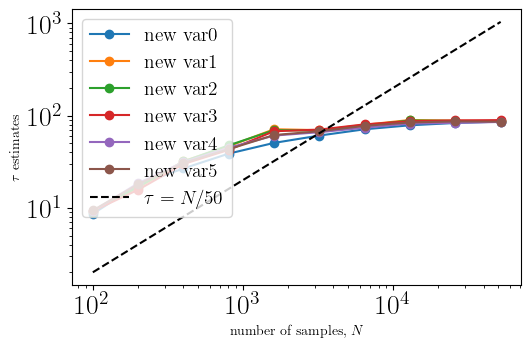

results/downsampled_mcmc/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps0.01_seed2601996_nw32_nt2_downsample10_injectFD1_usegpuTrue_templatefd_window_flagFalse.h5
{'StretchMove_0': {'acceptance_fraction': array([[0.40123491, 0.39939143, 0.39772563, 0.40056859, 0.40248981,
        0.40083512, 0.40290071, 0.40424445, 0.40066854, 0.40209002,
        0.40417782, 0.39976901, 0.39821427, 0.40176797, 0.40376692,
        0.40067965, 0.40228992, 0.40156807, 0.40673204, 0.40161249,
        0.39928038, 0.40124602, 0.40256755, 0.40203449, 0.39968017,
        0.40186791, 0.39980233, 0.40077959, 0.4051773 , 0.40027985,
        0.40306729, 0.40295623],
       [0.26140793, 0.26610548, 0.26286273, 0.26075272, 0.2609304 ,
        0.26256288, 0.26380668, 0.26024187, 0.26631648, 0.26479505,
        0.26232967, 0.2628072 , 0.26276278, 0.26157451, 0.26380668,
        0.2632181 , 0.26327362, 0.26693838, 0.26680511, 0.26166335,
        0.26576121, 0.26360678, 0.25846502, 0.26231857, 0.26298489,
        0.2602

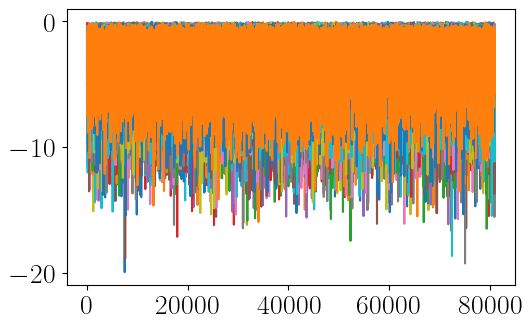

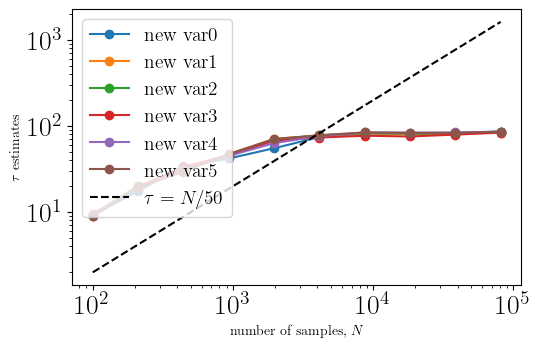

results/downsampled_mcmc/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps0.01_seed2601996_nw32_nt2_downsample100_injectFD1_usegpuFalse_templatefd_window_flagFalse.h5
{'StretchMove_0': {'acceptance_fraction': array([[0.46588883, 0.46780497, 0.46404857, 0.46901916, 0.46956934,
        0.46583191, 0.46755834, 0.46600266, 0.46900019, 0.46304307,
        0.4702713 , 0.47104914, 0.46674255, 0.46985392, 0.46748245,
        0.46317587, 0.46858281, 0.46583191, 0.47011952, 0.46755834,
        0.46725479, 0.4670461 , 0.46994878, 0.46585088, 0.46826029,
        0.46562322, 0.46736862, 0.46987289, 0.46970214, 0.46960729,
        0.46867767, 0.46970214],
       [0.26319484, 0.26721685, 0.26110795, 0.26143047, 0.26044394,
        0.26475052, 0.26573705, 0.26224625, 0.26374502, 0.26744451,
        0.26359325, 0.26687536, 0.26156327, 0.26511098, 0.26397268,
        0.26494024, 0.26408651, 0.26605957, 0.26499715, 0.26298615,
        0.26431417, 0.26338456, 0.25750332, 0.26431417, 0.26638209,
        0.26

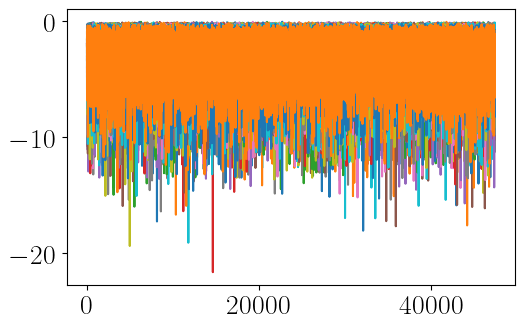

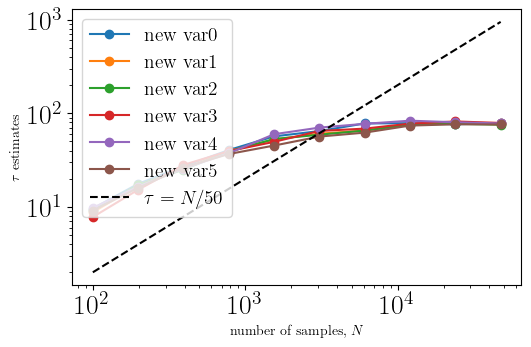

results/downsampled_mcmc/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps0.01_seed2601996_nw32_nt2_downsample1000_injectFD1_usegpuTrue_templatefd_window_flagFalse.h5
{'StretchMove_0': {'acceptance_fraction': array([[0.5057735 , 0.50975204, 0.50558845, 0.5069208 , 0.50797557,
        0.50673575, 0.50817913, 0.50780903, 0.51054774, 0.50523686,
        0.50673575, 0.50856773, 0.50592154, 0.50777202, 0.50529238,
        0.50351591, 0.50969652, 0.50534789, 0.51117691, 0.50771651,
        0.50427461, 0.50723538, 0.50721688, 0.50518135, 0.50412657,
        0.50568098, 0.50938194, 0.51058475, 0.50980755, 0.51043671,
        0.50910437, 0.5080681 ],
       [0.26326795, 0.26767209, 0.26186158, 0.26149149, 0.25993708,
        0.26478534, 0.26517395, 0.26260178, 0.26410067, 0.26674685,
        0.26393412, 0.26685788, 0.26123242, 0.26524796, 0.26397113,
        0.26493338, 0.26367506, 0.26633975, 0.26448927, 0.26332346,
        0.26432272, 0.26321244, 0.2580866 , 0.26400814, 0.26550703,
        0.26

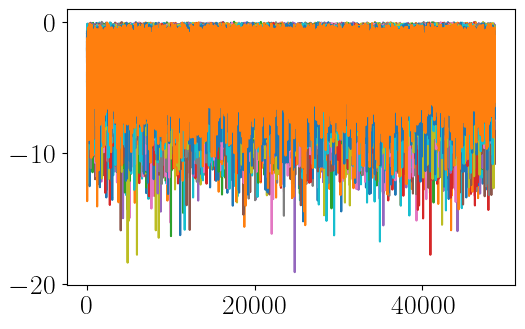

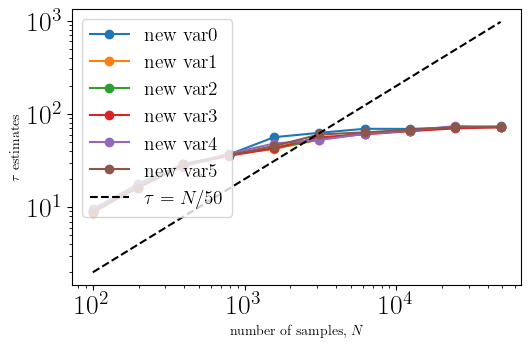

results/downsampled_mcmc/MCMC_M3.7e+06_mu2.9e+02_p1.4e+01_e0.58_T4.0_eps0.01_seed2601996_nw32_nt2_downsample10000_injectFD1_usegpuTrue_templatefd_window_flagFalse.h5
{'StretchMove_0': {'acceptance_fraction': array([[0.51068695, 0.51638543, 0.51503919, 0.51540802, 0.51669894,
        0.51487321, 0.51662517, 0.51271554, 0.51762102, 0.51026279,
        0.51728907, 0.51448594, 0.51195943, 0.51610881, 0.51188566,
        0.51284463, 0.51706777, 0.51465191, 0.52145689, 0.51472568,
        0.51171969, 0.51457815, 0.51603504, 0.51112955, 0.51684647,
        0.51166436, 0.51780544, 0.51621946, 0.5215491 , 0.5182296 ,
        0.51531581, 0.51701245],
       [0.26441678, 0.26841863, 0.26174274, 0.26045182, 0.26319963,
        0.26419548, 0.26539419, 0.26321807, 0.26567082, 0.2668142 ,
        0.26248041, 0.26439834, 0.2621669 , 0.26502536, 0.26377132,
        0.26661134, 0.26410327, 0.26522822, 0.26596588, 0.26231443,
        0.26502536, 0.26137391, 0.25626556, 0.26316275, 0.26651913,
        0.2

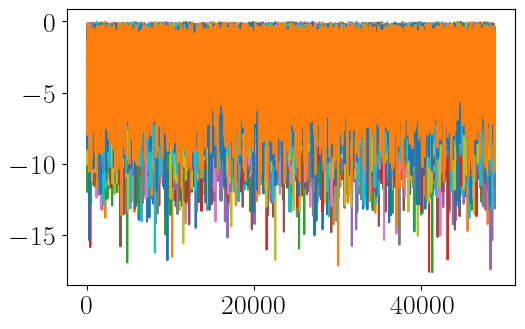

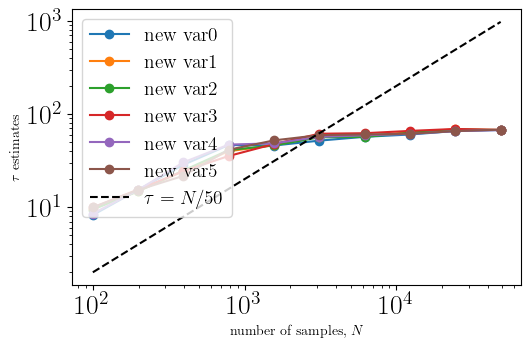

In [43]:
# filename = 'emri_M1e+06_mu1e+01_p9.5_e0.35_T1.0_eps1e-05_seed2601996_injectFD1_templatefd.h5'
temp=0

samp_final_ds = []
for filename in datasets:
    file  = HDFBackend(filename)
    print(filename)
    print(file.get_move_info())
    max_iter = file.iteration
    burn = int(max_iter*0.1)
    thin = 1
    ll = file.get_log_like(discard=burn, thin=thin)
    mask = np.arange(32)#[file.get_move_info()['StretchMove_0']['acceptance_fraction'][0]>0.1]
    plt.figure()
    [plt.plot(ll[:,temp,walker],'-',label=f'{walker}') for walker in mask]
    plt.show()
    
    # get samples
    inds = file.get_inds(discard=burn, thin=thin)['emri']
    samp = file.get_chain(discard=burn, thin=thin)['emri'][:,temp,mask,...]
    get_autocorr_plot(samp[:,:,0,:])
    logl = ll[:,temp,mask,...]



    samp_final_ds.append( np.hstack((samp[inds[:,temp,mask,...]],logl[inds[:,temp,mask,0],None])) )

In [44]:
name_ds = [f'Downsampling factor '+ datasets[ii].split('_downsample')[1].split('_inject')[0] for ii in range(len(datasets))]
name_ds

['Downsampling factor 0',
 'Downsampling factor 1',
 'Downsampling factor 10',
 'Downsampling factor 100',
 'Downsampling factor 1000',
 'Downsampling factor 10000']

In [45]:
name_ds[0]=r'$(50,6311631,\{4.26, 0.061\})$'
# name_ds[1]=r'$f_{\rm max}=6.3$ mHz with $N_f=3.55443  \times 10^{5}$, CPU likelihood speed = $2.3$ s'
# name_ds[2]=r'$f_{\rm max}=6.3$ mHz with $N_f=3.5544  \times 10^{4}$, CPU likelihood speed = $0.55$ s'
name_ds[3]=r'$(2.8,3554,\{0.34, 0.029\})$'
name_ds[5]=r'$(2.8,35,\{0.32,0.029\})$'

In [46]:
6311631/2

3155815.5

In [47]:
ind = np.asarray([0,3,5])

/data/lsperi/miniconda3/envs/fd_env/lib/python3.7/site-packages/corner/core.py:675: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(X2, Y2, H2.T, V, **contour_kwargs)


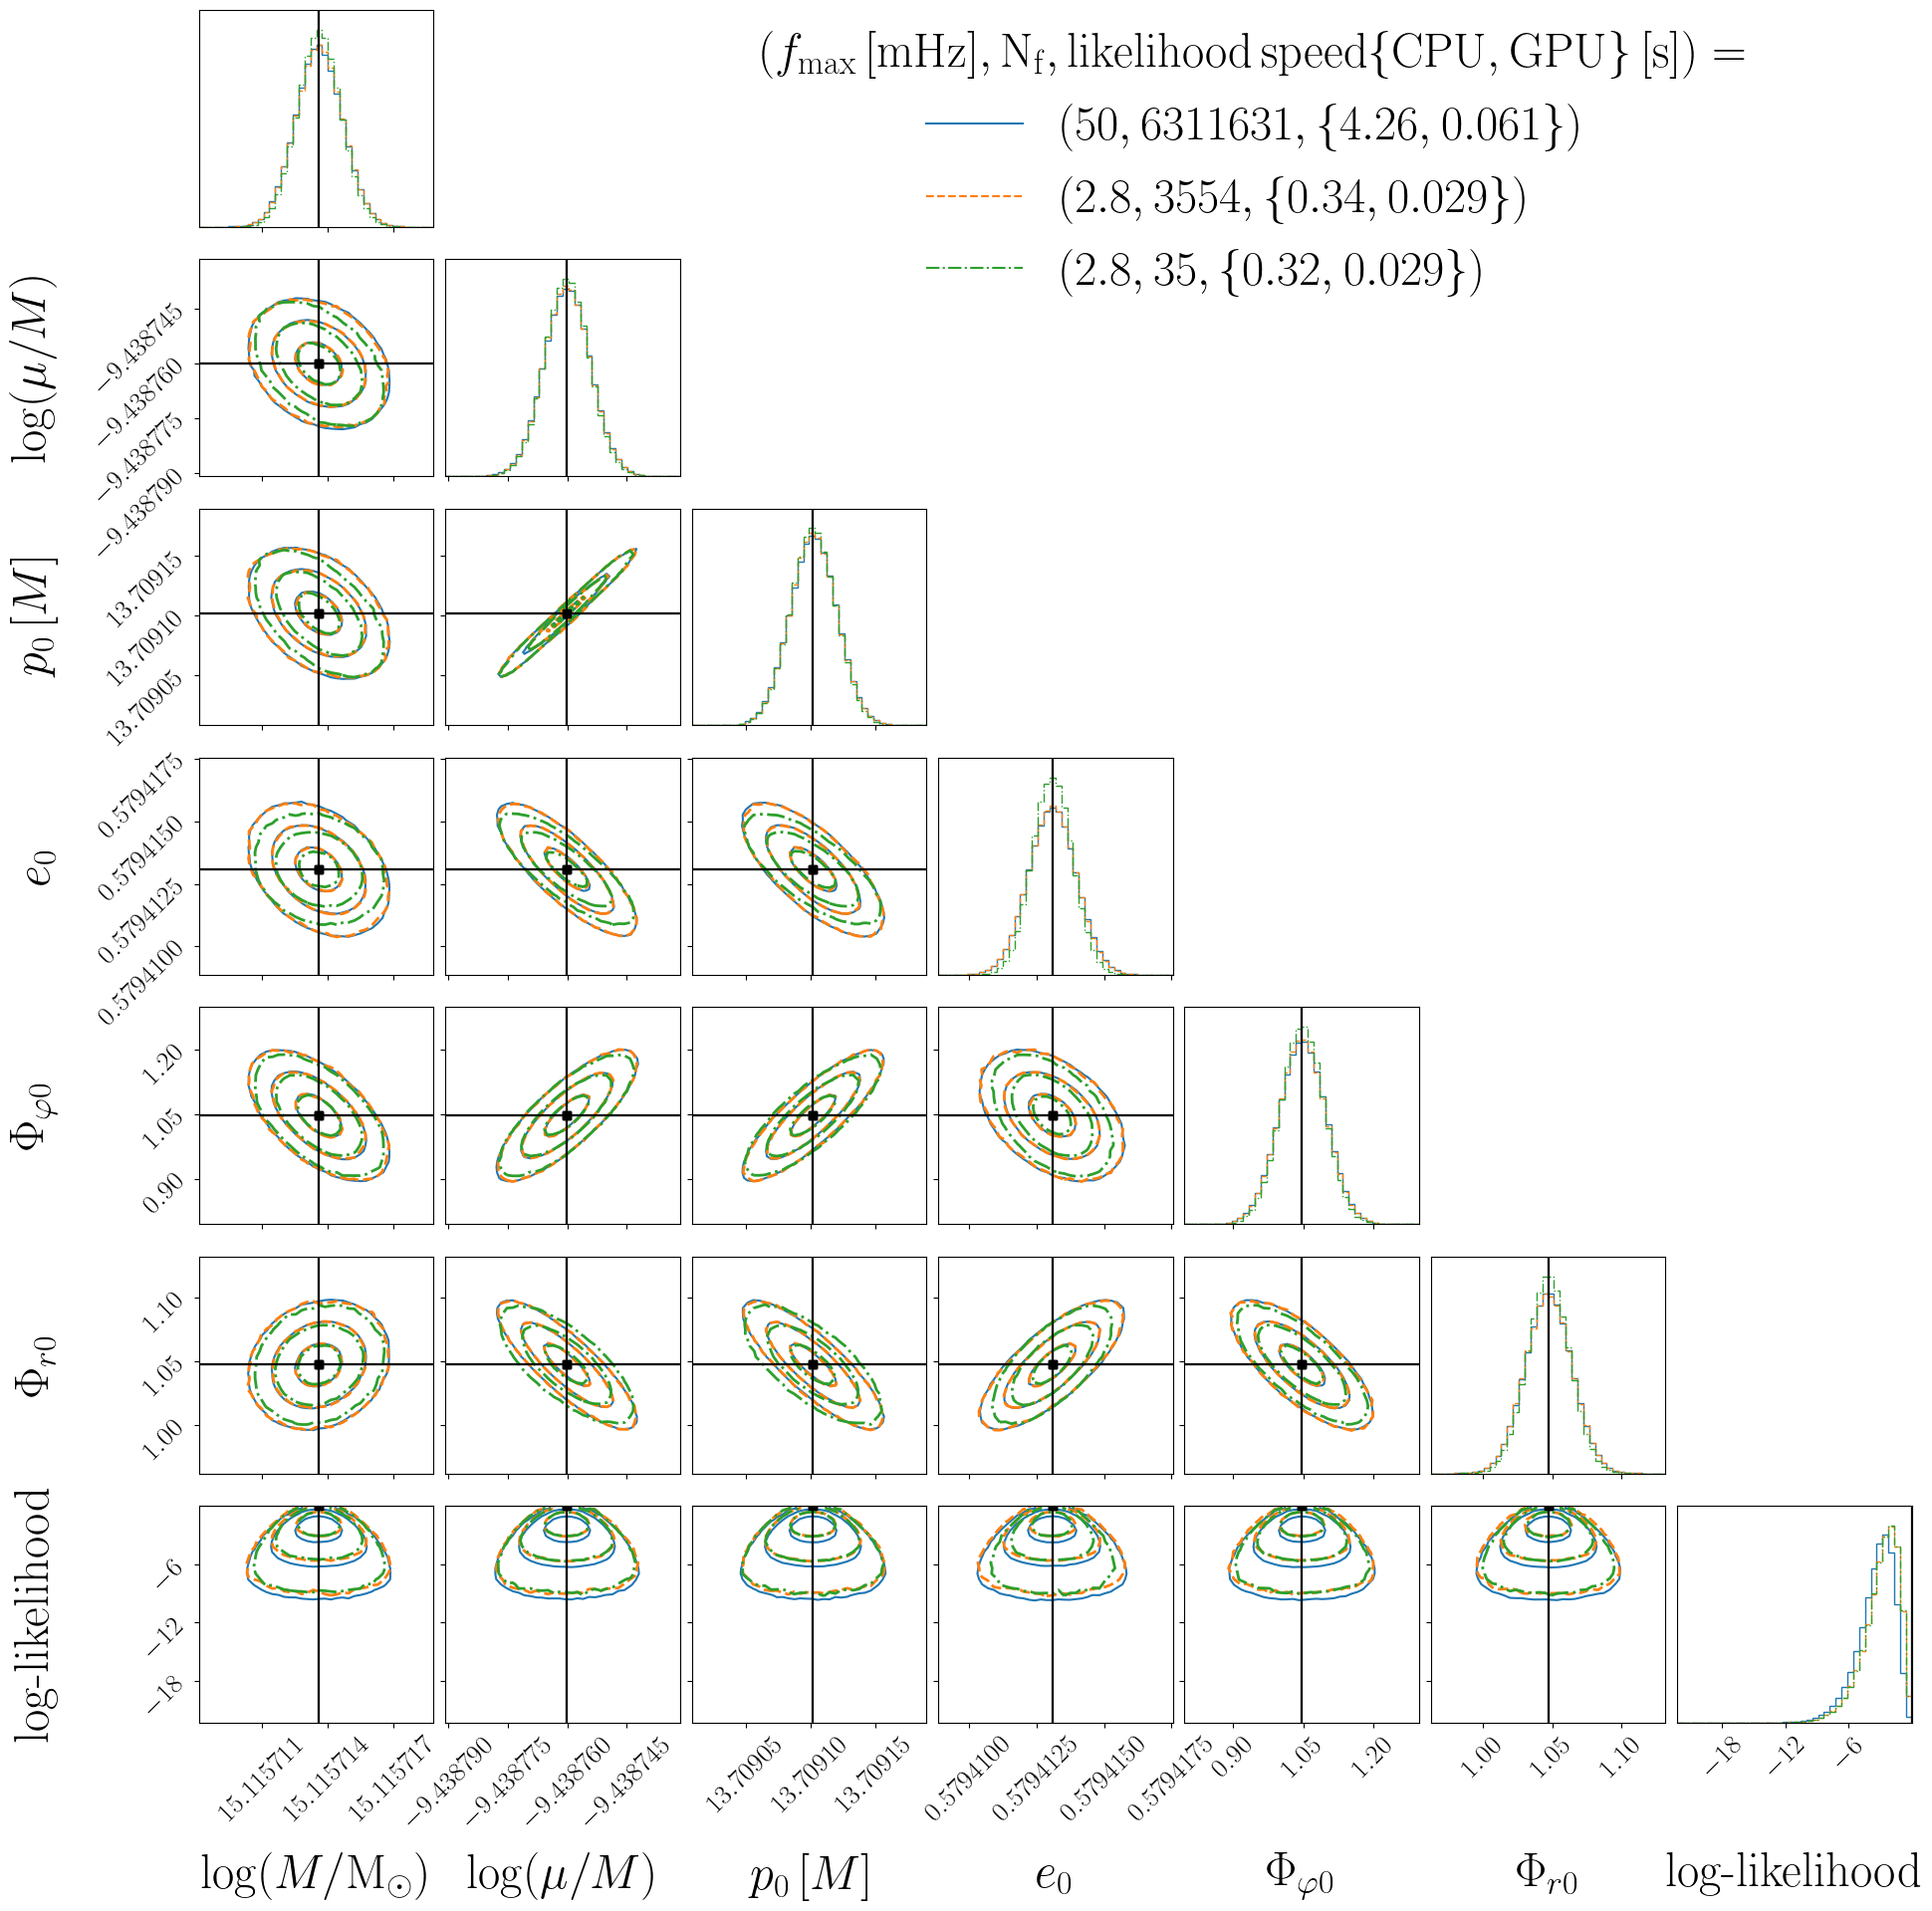

In [48]:
overlaid_corner([samp_final_ds[el] for el in ind], [name_ds[el] for el in ind], name_save='figures/downsampling_posterior_comparison_intrinsic')


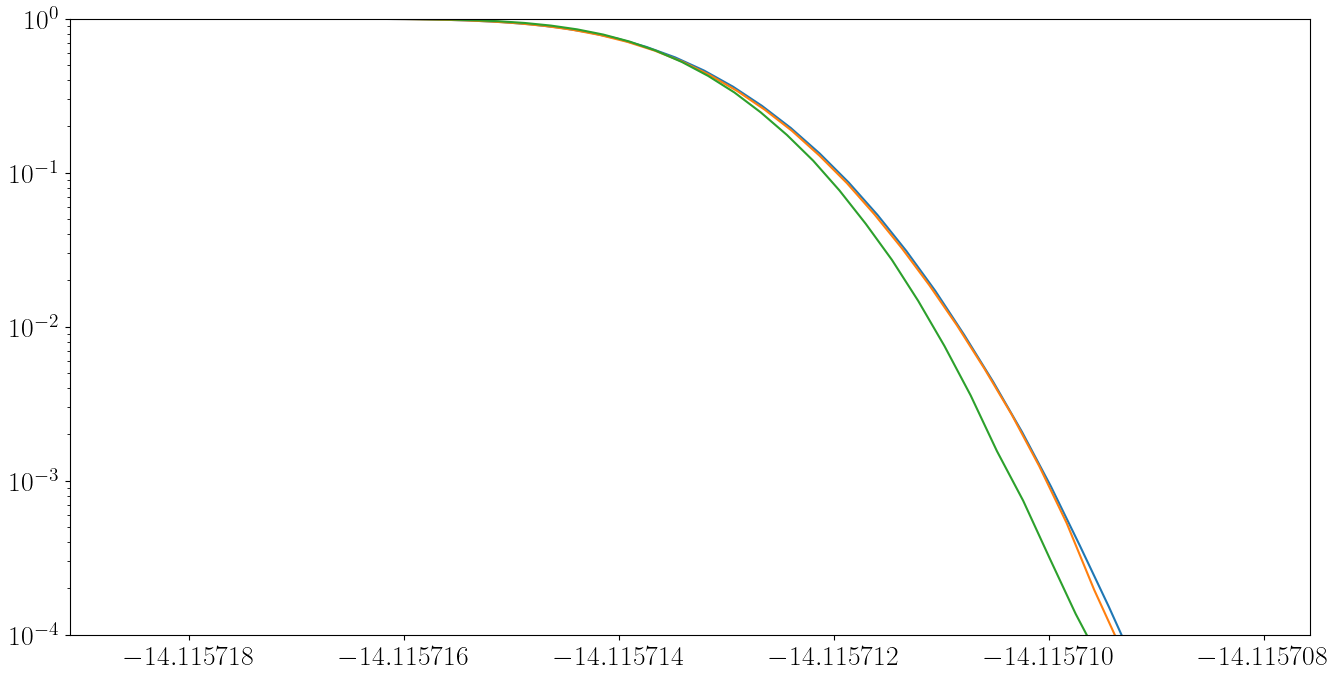

In [49]:
plt.figure(figsize=(16,8))
for el in [samp_final_ds[el] for el in ind]:
    # some fake data
    data = el[:,0]
    # evaluate the histogram
    values, base = np.histogram(data, bins=40, density=True)
    #evaluate the cumulative
    cumulative = np.cumsum(values)/np.sum(values)
    # plot the cumulative function
    plt.semilogy(1-base[:-1], cumulative)

plt.ylim(1e-4,1)
plt.show()

In [50]:
from scipy.stats import entropy
set_num = [[0,ii] for ii in range(1,len(samp_final_ds))]
for ii in range(len(set_num)):
    print('----------------------')
    print("set", name_ds[ii+1])
    for var in range(6):
        bins = np.linspace(samp_final[0][:,var].min(),samp_final[0][:,var].max(),num=20)
        counts1,_ = np.histogram(samp_final_ds[set_num[ii][0]][:,var],bins=bins)
        counts2,_ = np.histogram(samp_final_ds[set_num[ii][1]][:,var],bins=bins)
        print(entropy(counts2,qk=counts1))

----------------------
set Downsampling factor 1
0.00023796002057560898
9.841256959433918e-05
0.00016980074092120385
inf
0.00030432489827367606
inf
----------------------
set Downsampling factor 10
5.325679443848244e-06
inf
inf
6.94263739468735e-05
5.257522231821408e-05
9.995924752156836e-05
----------------------
set $(2.8,3554,\{0.34, 0.029\})$
4.324902052224209e-05
0.00010395933631267328
0.00014645790103987597
2.9483372204979066e-05
0.00011441992234895251
6.404528417620709e-05
----------------------
set Downsampling factor 1000
9.219501564009845e-05
0.002655723565545793
0.0016091184948220632
0.005290266151157734
7.995085702917456e-05
0.0004713484434050297
----------------------
set $(2.8,35,\{0.32,0.029\})$
0.0036553648406397504
0.0015790483717335081
0.0009637182627011279
0.017506185090799934
0.005448438358412908
0.007385915369865548


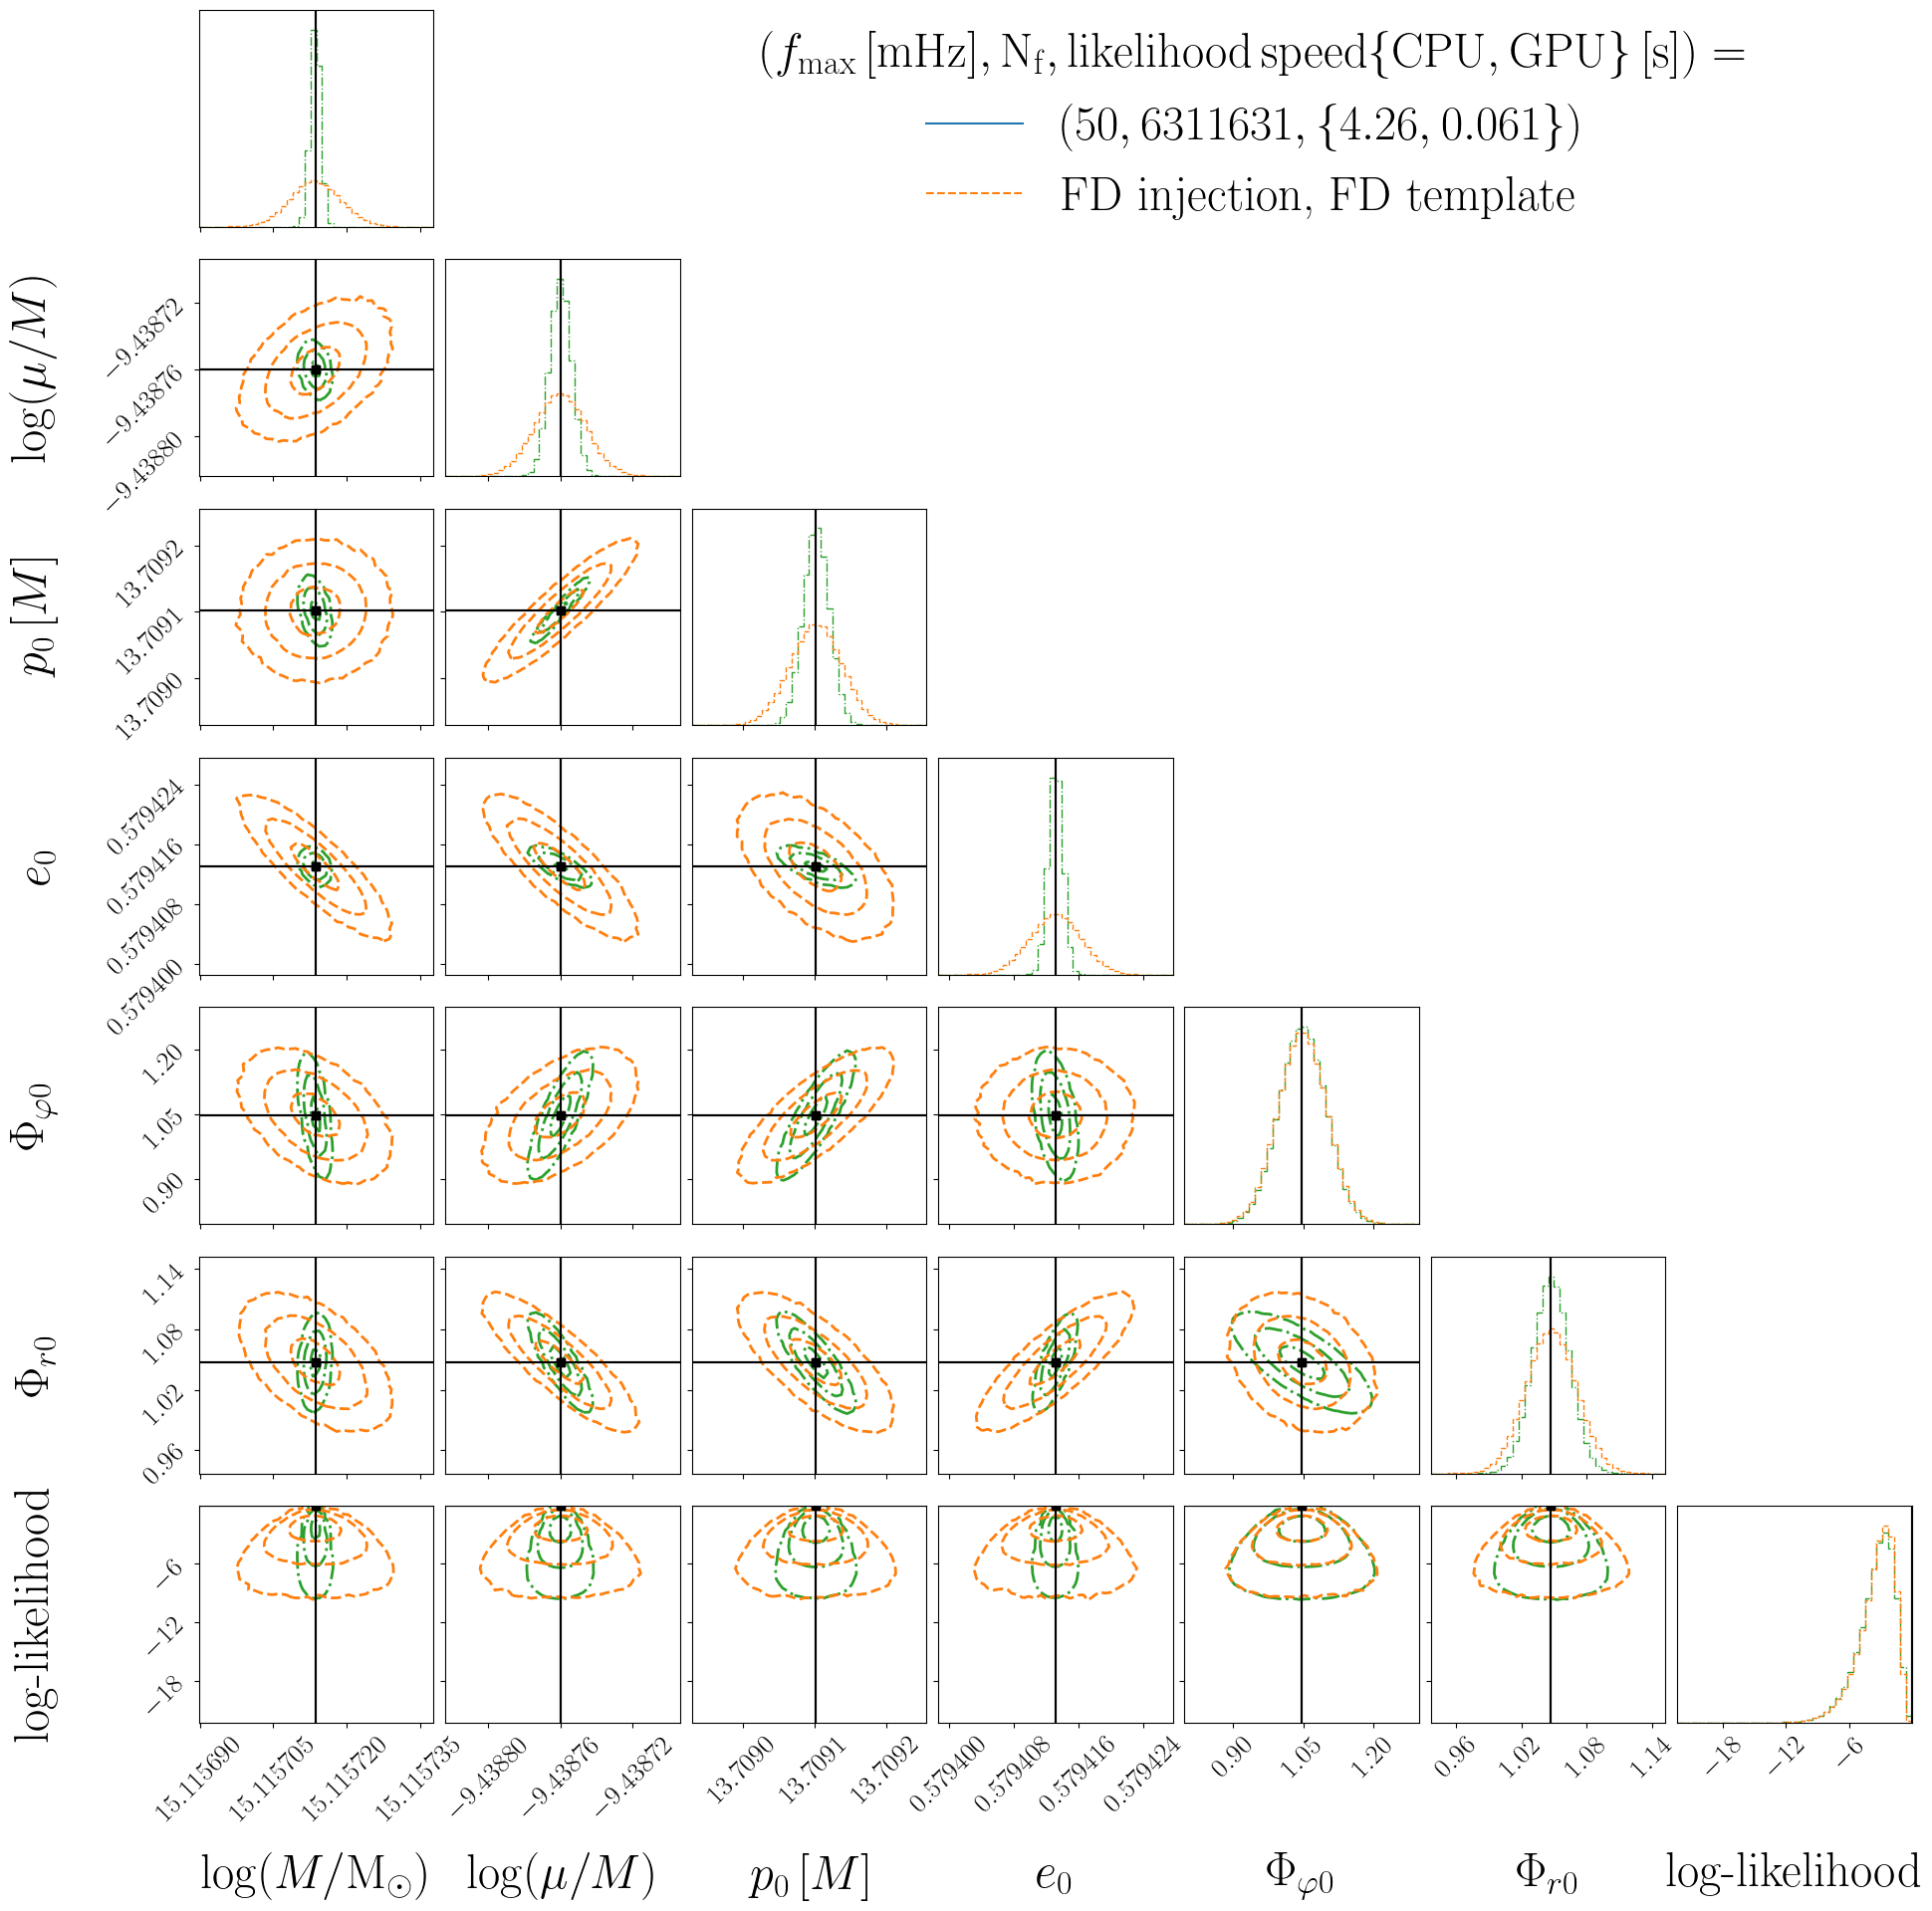

In [51]:
overlaid_corner([samp_final_ds[0],samp_final[2]],
                [name_ds[0],name_mcmc[2]]
               )

In [52]:
for ii in range(7):
    print(np.std(samp_final[0][:,ii]) / np.std(samp_final_ds[0][:,ii]))

4.870860099476719
2.428448969445232
1.9802361128257857
3.6429631977982795
1.037062119977268
1.3704079306364105
0.9760932161688094
